# Ising Model upto 2 nearest neighbour interactions

In [1]:
import logging
import numpy as np
from docplex.mp.model_reader import ModelReader

import numpy as np
from docplex.mp.basic import Expr
from docplex.mp.model import Model
from docplex.mp.solution import SolveSolution
from docplex.util.status import JobSolveStatus
import cplex.callbacks as cpx_cb
#from docplex.mp.callbacks.cb_mixin import ModelCallbackMixin
from docplex.mp.model import Model
from docplex.mp.relax_linear import LinearRelaxer

import matplotlib.pyplot as plt
from docplex.mp.model import Model


In [2]:
def ising_model(Ny, h_i, J_1_i_j, J_2_i_j):
    opt_model = Model()
    
    # Ny= 10
    ## Ny is the number of spin sites
    
    y={}
    for i in range(0, Ny):
        y[i]= opt_model.binary_var(name=f"y_{i}")
    
    
    "Note that: original variables y[t] are binary variables {0,1}, "
    "To convert it into the spin variables {+1, -1}, we have to transform s[t] = (-1+(2*y[t]))"
    " when y[t]= 0 then s[t] = -1 and when y[t]= 1 then s[t] = 1 "
    
    objective = opt_model.linear_expr()
    ## objective is the hamiltonian/energy value we want to minimize
    
    
    for t_1 in range(0, Ny-1):
        objective += (-1+(2*y[t_1]))*J_1_i_j*(-1+(2*y[t_1+1]))
        
    objective += (-1+(2*y[0]))*J_1_i_j*(-1+(2*y[Ny-1]))
    
    for t_2 in range(0, Ny-2):
        objective += (-1+(2*y[t_2]))*J_2_i_j*(-1+(2*y[t_2+2])) 
        
    objective += (-1+(2*y[0]))*J_2_i_j*(-1+(2*y[Ny-2]))
    objective += (-1+(2*y[1]))*J_2_i_j*(-1+(2*y[Ny-1]))
    
    for q in range(0, Ny):
        objective += (-1+(2*y[q]))* h_i
        
    opt_model.minimize(objective)
    
    result = opt_model.solve(log_output=False)
    y_value=[result.get_value(f"y_{l}") for l in range(0, Ny)]      
        
    energy = result.objective_value

    spin = [(-1+(2*y_value[t])) for t in range(0, Ny-1)]

    magnetization = 0
    for r in range(0, Ny):
        magnetization = magnetization+ (-1+(2*y_value[r]))
    
    return energy, spin, magnetization

In [3]:
Ny= 100
J_1_i_j = -1
J_2_i_j = -1
h_i = 0.01
energy, spin, magnetization = ising_model(Ny, h_i, J_1_i_j, J_2_i_j)

In [4]:
energy

-200.9999999999991

In [5]:
magnetization

-100

# N = 18

In [19]:
energy = np.zeros((101, 101))
magnetization = np.zeros((101, 101))
Ny= 18
h = 0.01
for i in range(0,101):
    for j in range(0,101):
        j_1 = -1 + 0.02*i
        j_2 = -1 + 0.02*j
        energy_1, spin_1, magnetization_1 = ising_model(Ny, h, j_1, j_2)
        energy[i][j] = energy_1
        magnetization[i][j] = magnetization_1


In [20]:
# plt.imshow(energy)#, interpolation='none')
# plt.show()

In [21]:
# plt.imshow(magnetization)#, interpolation='none')
# plt.show()

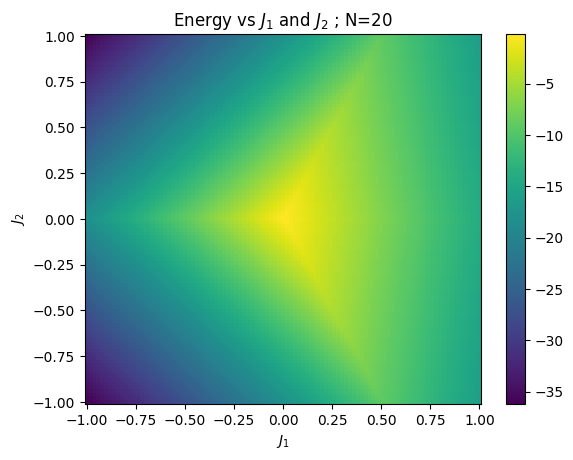

In [22]:
x = np.arange(-1,1.02,0.02)
y = np.arange(-1,1.02,0.02)

X, Y = np.meshgrid(x, y)
Z = energy
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.xlabel('$J_1$')
plt.ylabel('$J_2$')
plt.title("Energy vs $J_1$ and $J_2$ ; N=20")
plt.show()

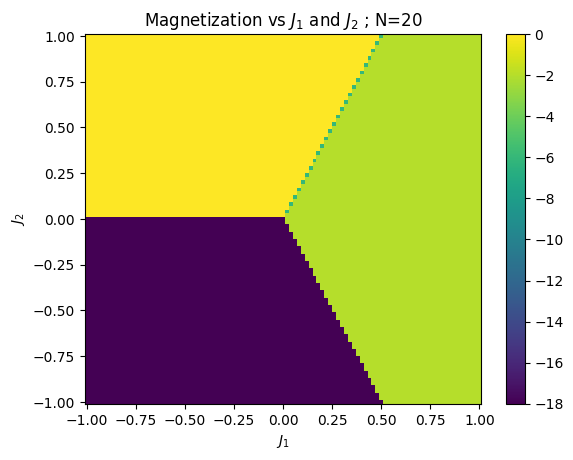

In [23]:
x = np.arange(-1,1.02,0.02)
y = np.arange(-1,1.02,0.02)

X, Y = np.meshgrid(x, y)
Z = magnetization
plt.pcolormesh(X, Y, Z)
plt.colorbar()
plt.xlabel('$J_1$')
plt.ylabel('$J_2$')
plt.title("Magnetization vs $J_1$ and $J_2$ ; N=20")
plt.show()

# Ising Model upto 3 nearest neighbour interactions

In [35]:
def ising_model_3NN(Ny, h_i, J_1_i_j, J_2_i_j, J_3_i_j):
    opt_model = Model()
    
    # Ny= 10
    ## Ny is the number of spin sites
    
    y={}
    for i in range(0, Ny):
        y[i]= opt_model.binary_var(name=f"y_{i}")
    
    
    "Note that: original variables y[t] are binary variables {0,1}, "
    "To convert it into the spin variables {+1, -1}, we have to transform s[t] = (-1+(2*y[t]))"
    " when y[t]= 0 then s[t] = -1 and when y[t]= 1 then s[t] = 1 "
    
    objective = opt_model.linear_expr()
    ## objective is the hamiltonian/energy value we want to minimize
    
    
    for t_1 in range(0, Ny-1):
        objective += (-1+(2*y[t_1]))*J_1_i_j*(-1+(2*y[t_1+1]))
        
    objective += (-1+(2*y[0]))*J_1_i_j*(-1+(2*y[Ny-1]))
    
    for t_2 in range(0, Ny-2):
        objective += (-1+(2*y[t_2]))*J_2_i_j*(-1+(2*y[t_2+2])) 
        
    objective += (-1+(2*y[0]))*J_2_i_j*(-1+(2*y[Ny-2]))
    objective += (-1+(2*y[1]))*J_2_i_j*(-1+(2*y[Ny-1]))
    
    for t_3 in range(0, Ny-3):
        objective += (-1+(2*y[t_3]))*J_3_i_j*(-1+(2*y[t_3+3])) 
        
    objective += (-1+(2*y[0]))*J_3_i_j*(-1+(2*y[Ny-3]))
    objective += (-1+(2*y[1]))*J_3_i_j*(-1+(2*y[Ny-2]))  
    objective += (-1+(2*y[2]))*J_3_i_j*(-1+(2*y[Ny-1])) 
    
    for q in range(0, Ny):
        objective += (-1+(2*y[q]))* h_i
        
    opt_model.minimize(objective)
    
    result = opt_model.solve(log_output=False)
    y_value=[result.get_value(f"y_{l}") for l in range(0, Ny)]      
        
    energy = result.objective_value

    spin = [(-1+(2*y_value[t])) for t in range(0, Ny-1)]

    magnetization = 0
    for r in range(0, Ny):
        magnetization = magnetization+ (-1+(2*y_value[r]))
    
    return energy, spin, magnetization

# N= 18

In [36]:
Ny= 18
J_1_i_j = -1
J_2_i_j = -1
J_3_i_j = -1
h_i = 0.01
energy, spin, magnetization = ising_model_3NN(Ny, h_i, J_1_i_j, J_2_i_j, J_3_i_j)

In [37]:
energy, magnetization

(-54.179999999999964, -18)

In [38]:
energy = np.zeros((41, 41, 41))
magnetization = np.zeros((41, 41, 41))
Ny= 18
h = 0.01
for i in range(0,41):
    for j in range(0,41):
        for k in range(0,41):
            j_1 = -1 + 0.05*i
            j_2 = -1 + 0.05*j
            j_3 = -1 + 0.05*k
            energy_1, spin_1, magnetization_1 = ising_model_3NN(Ny, h, j_1, j_2, j_3)
            energy[i][j][k] = energy_1
            magnetization[i][j][k] = magnetization_1


#### Here we plot Energies and magnetizations w.r.t $J_1$ and $J_2$ varying $J_3 = -1$ to $J_3 = 1$. 

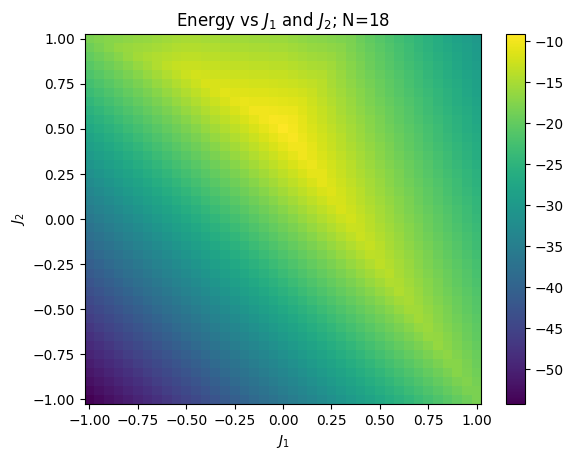

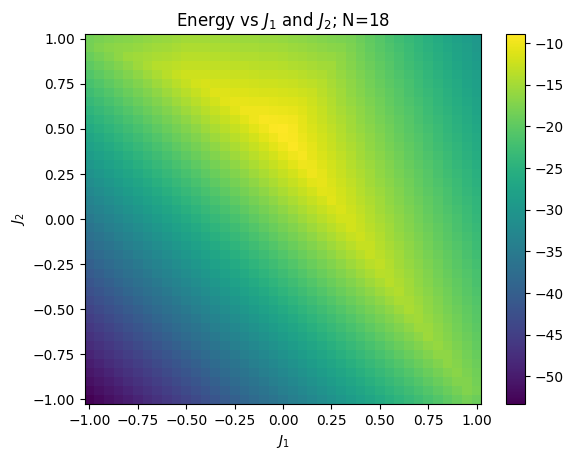

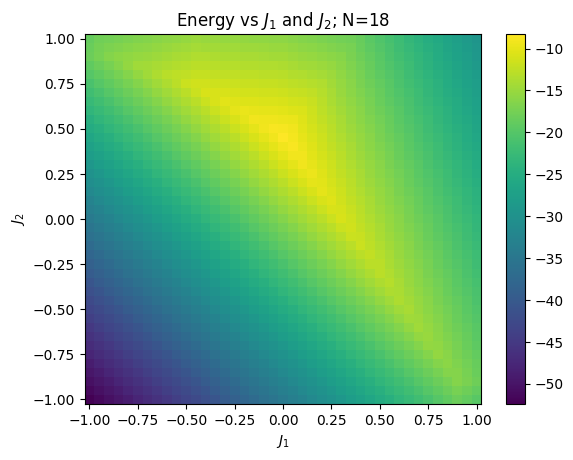

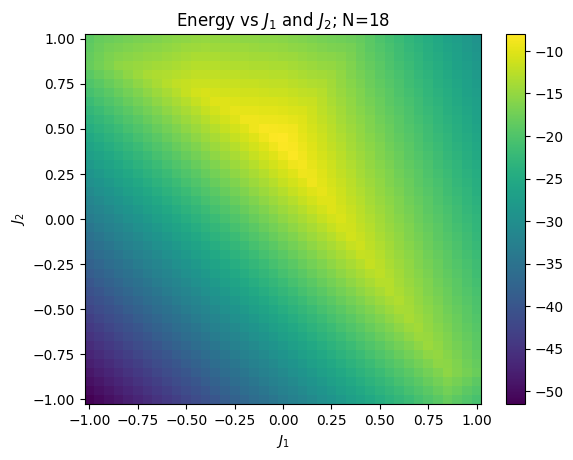

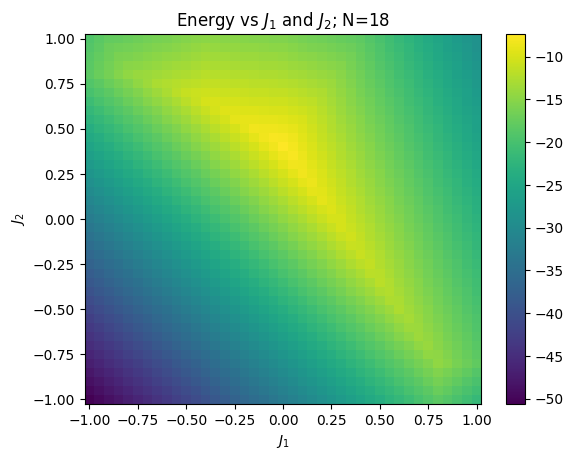

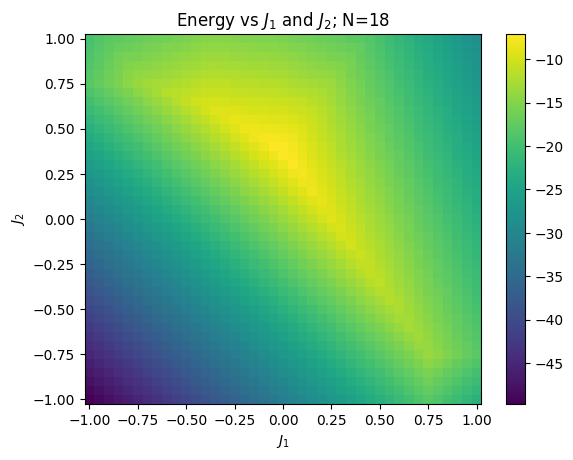

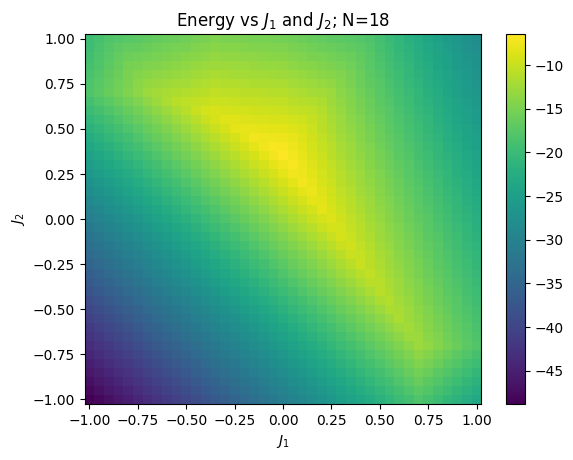

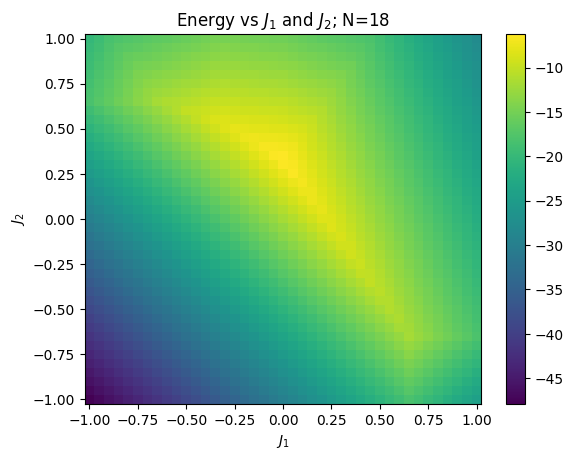

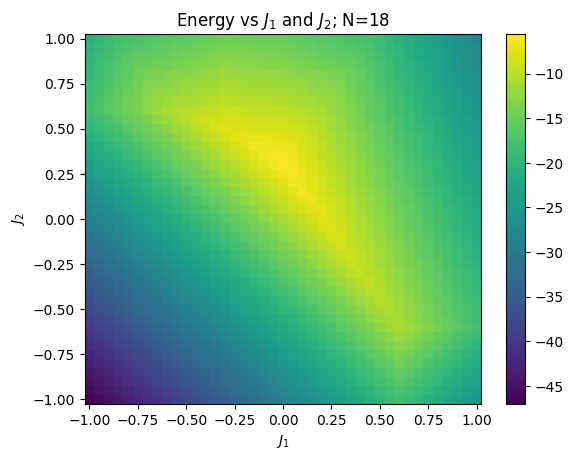

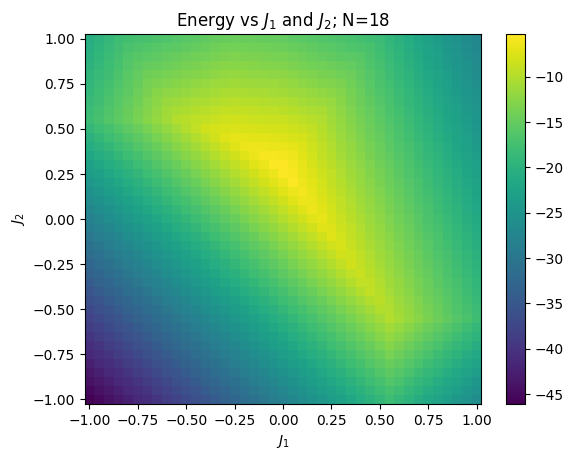

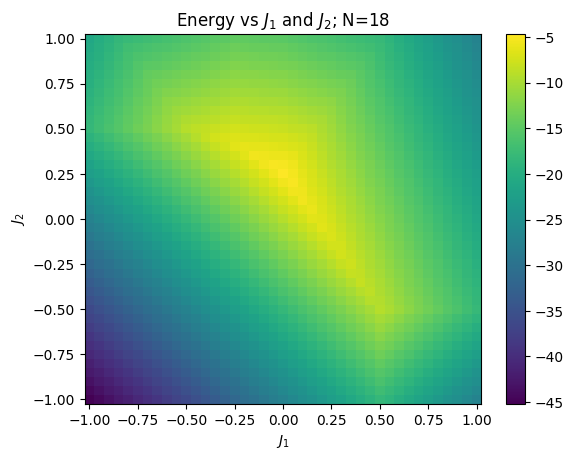

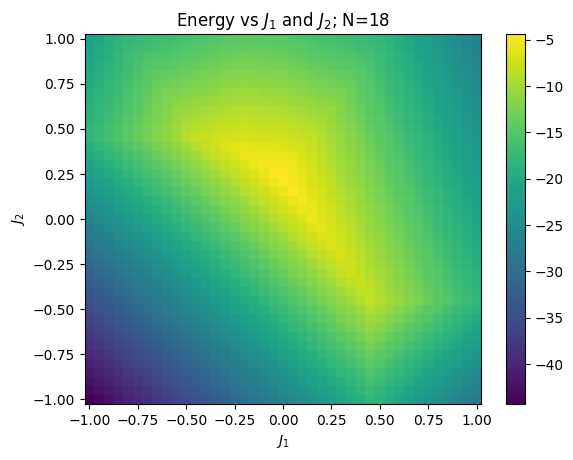

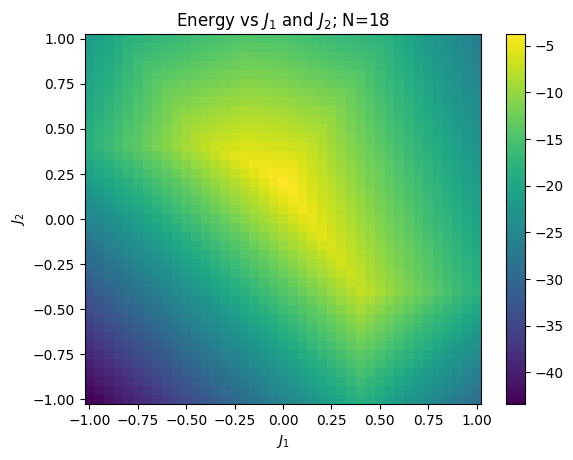

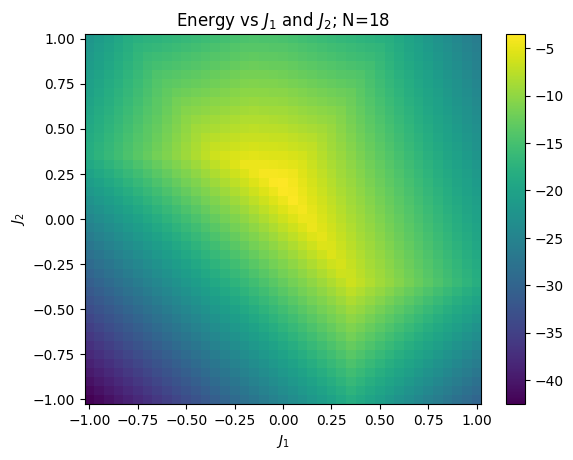

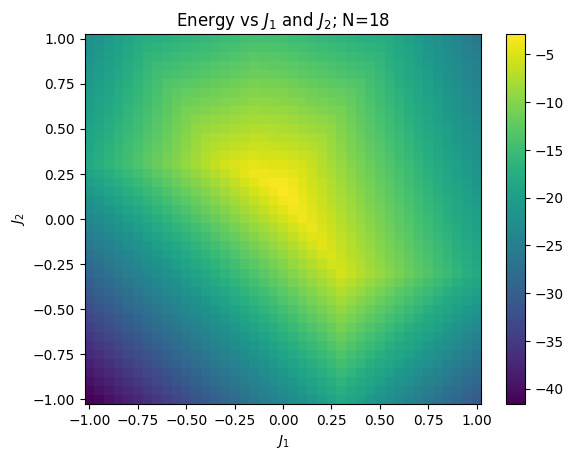

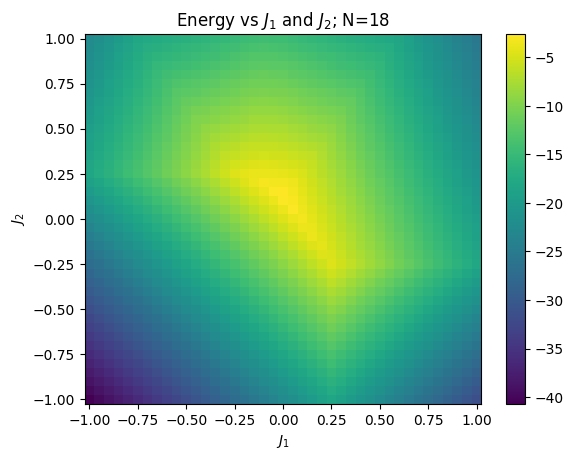

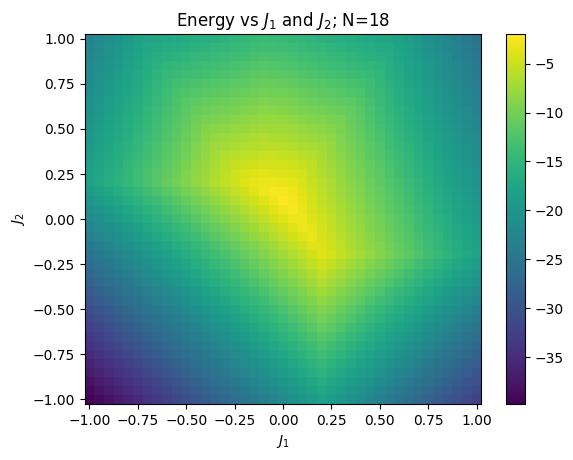

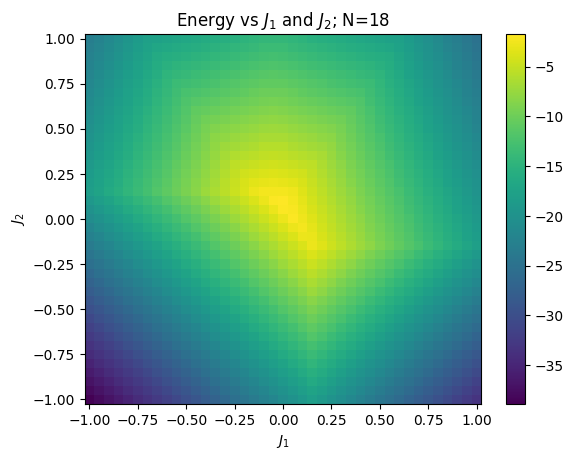

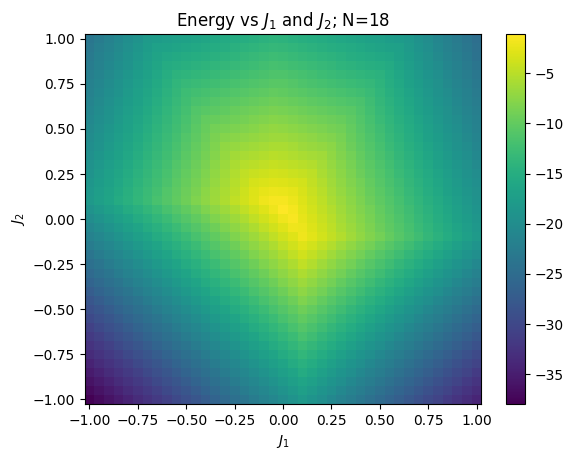

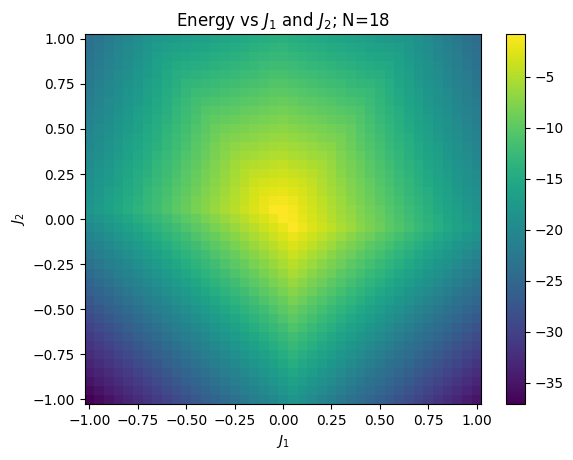

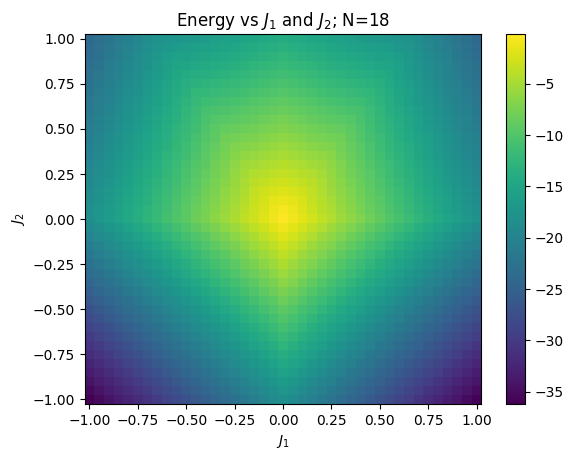

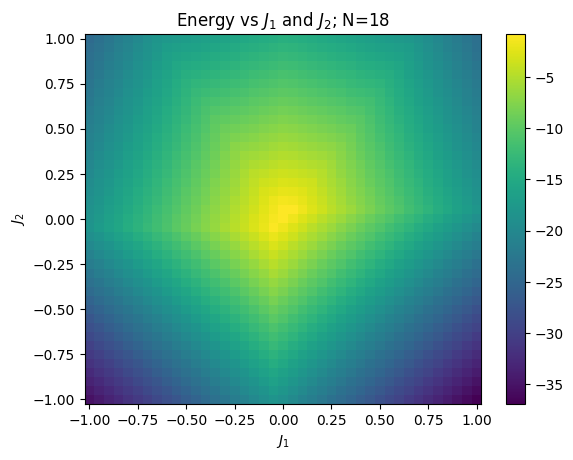

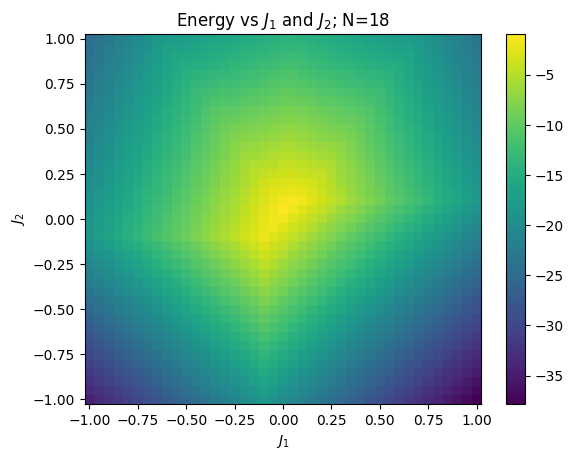

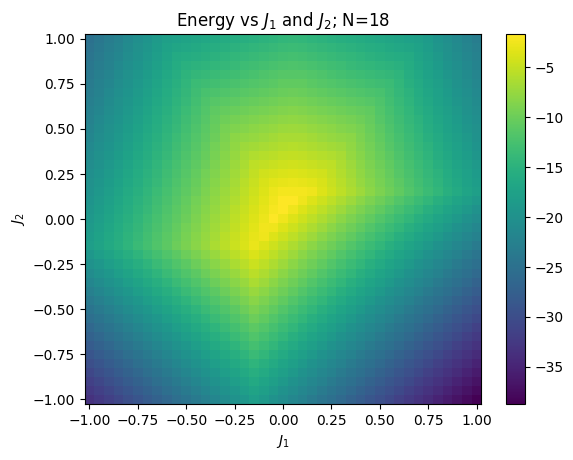

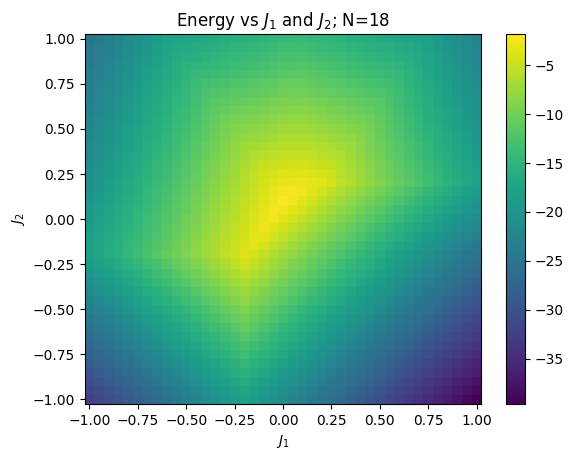

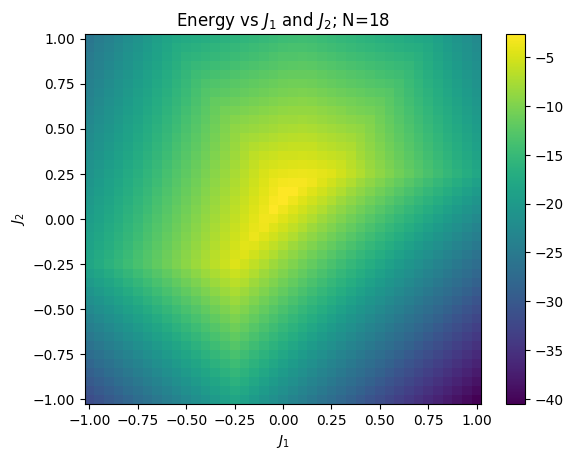

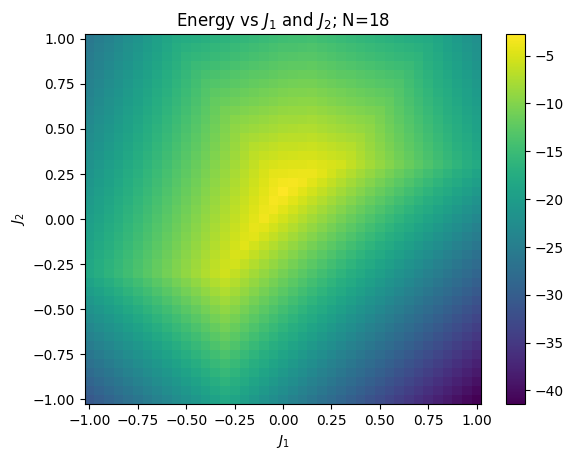

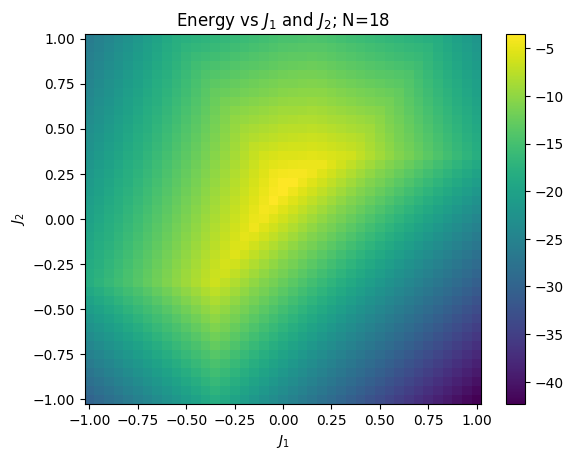

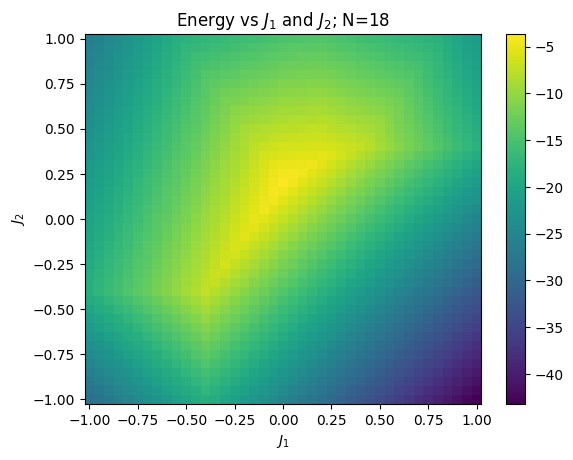

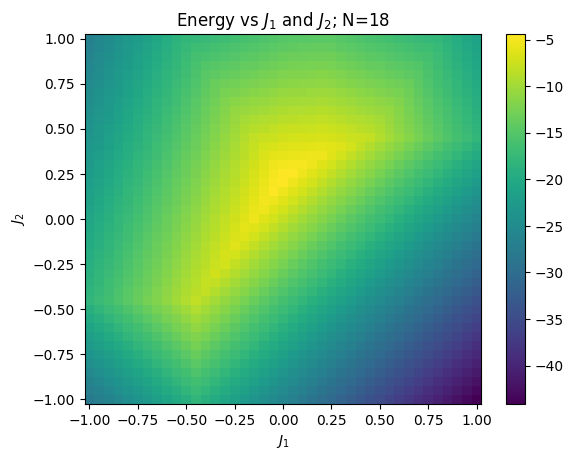

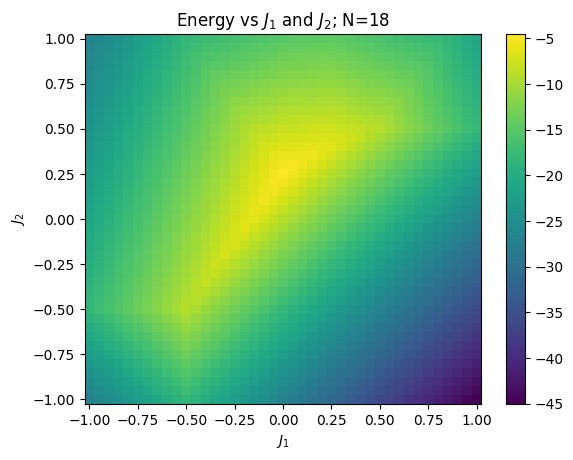

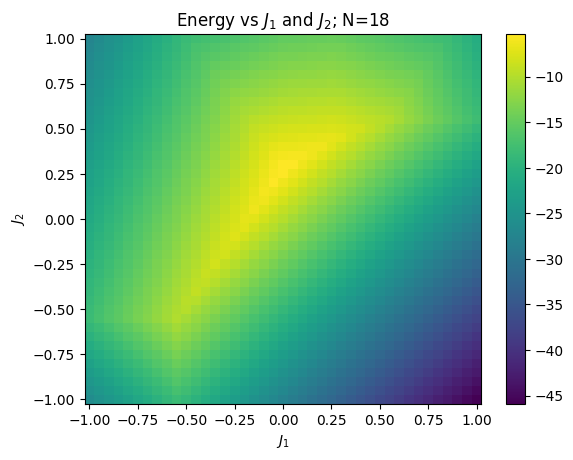

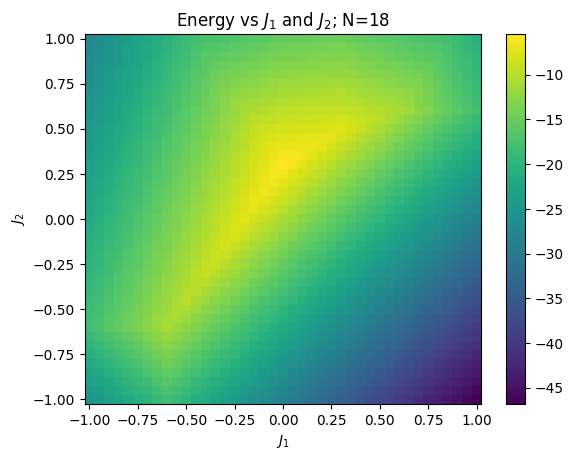

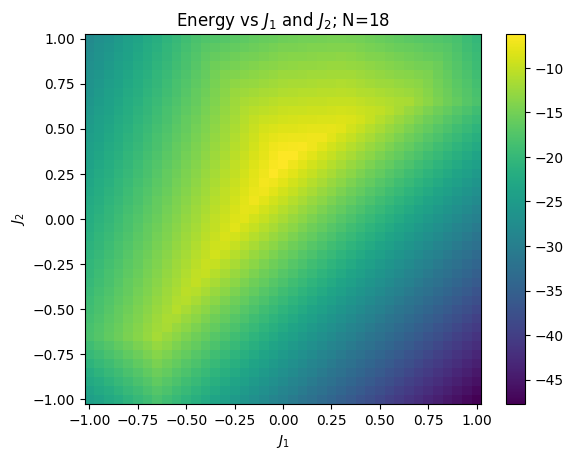

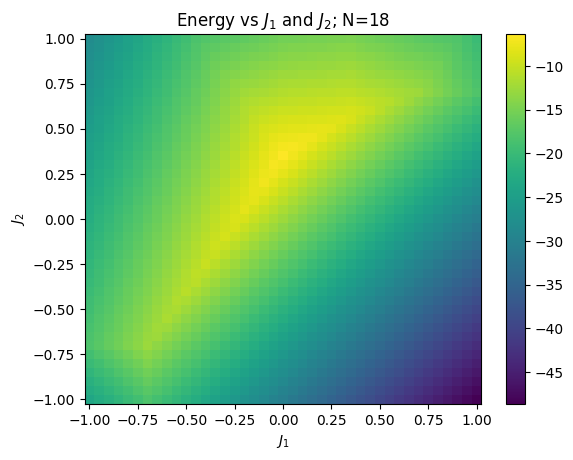

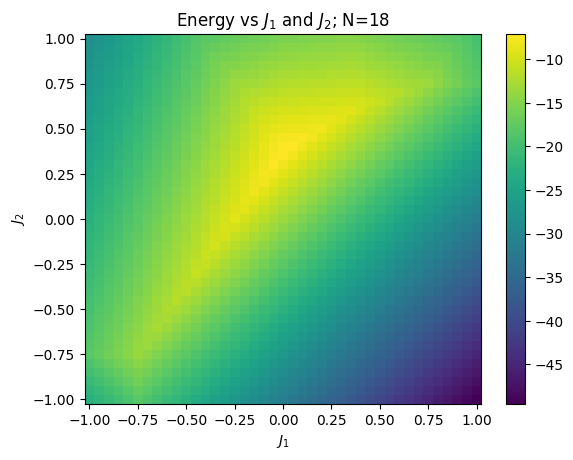

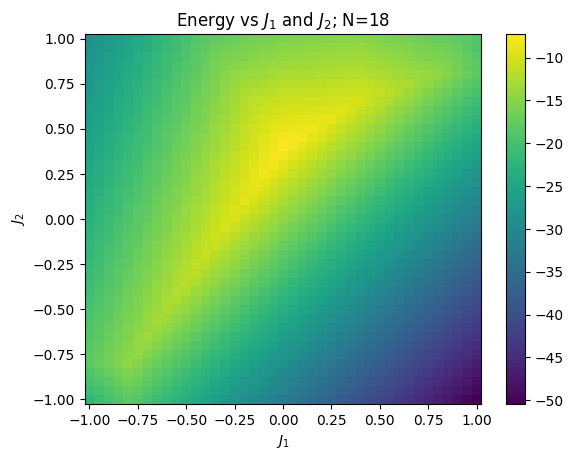

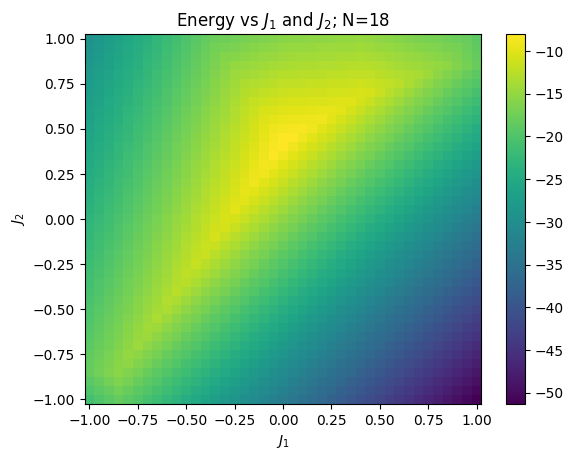

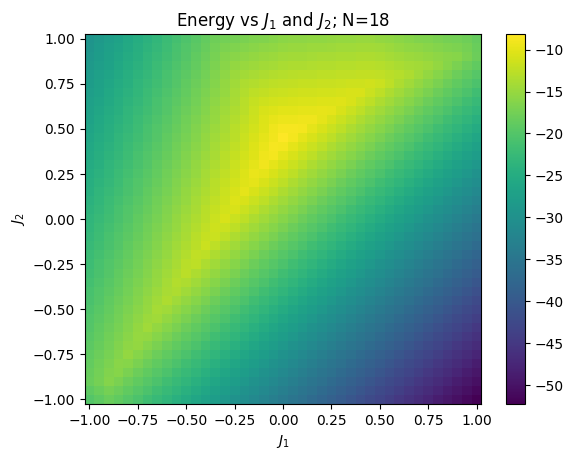

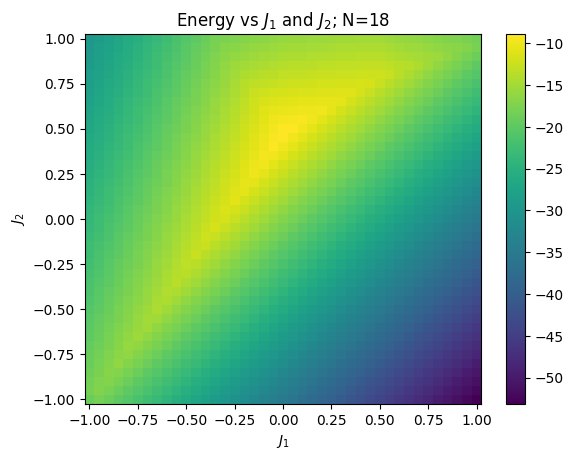

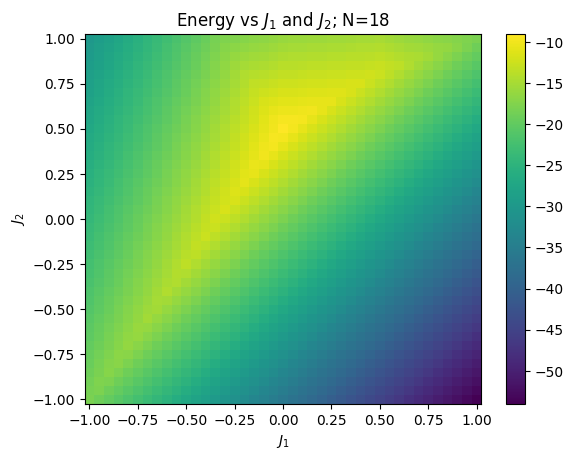

In [50]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = energy[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Energy vs $J_1$ and $J_2$; N=18")
    plt.show()

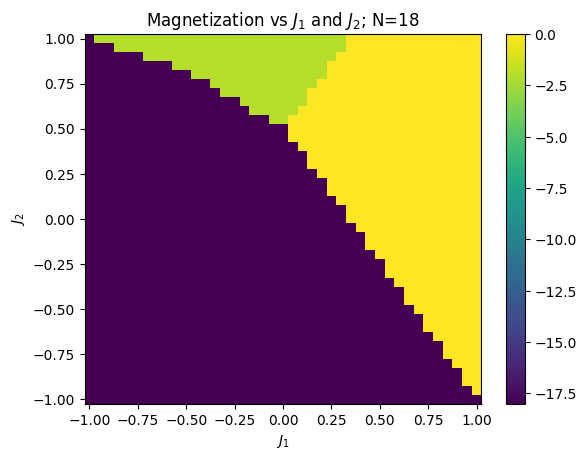

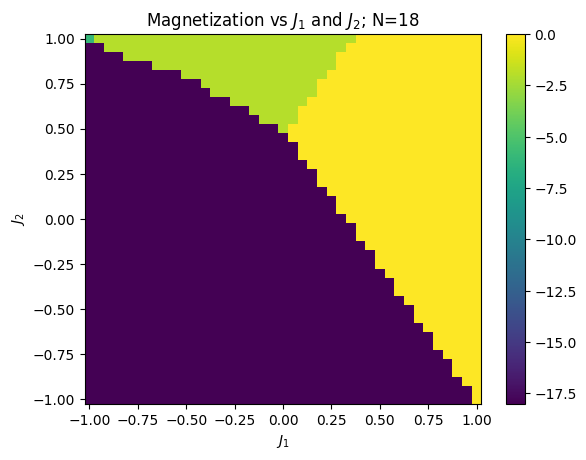

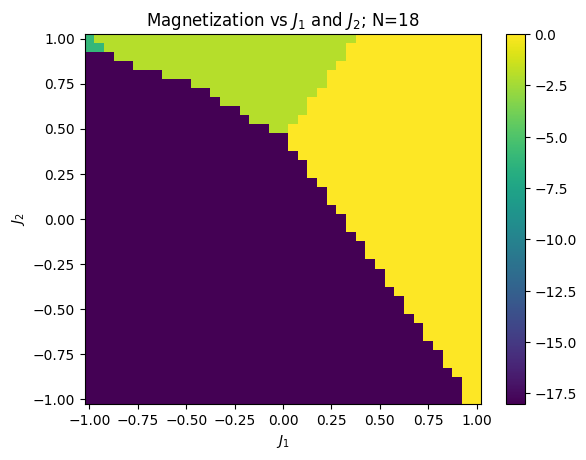

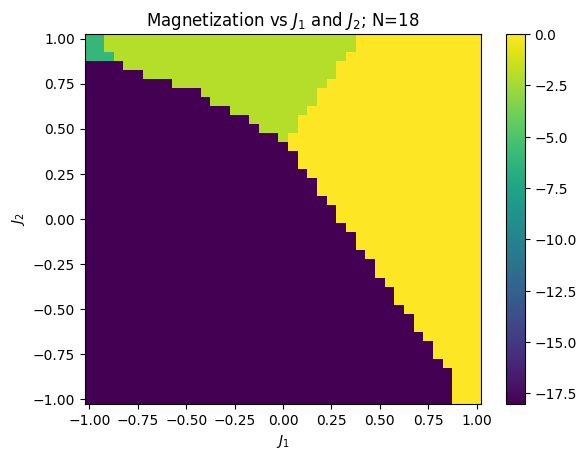

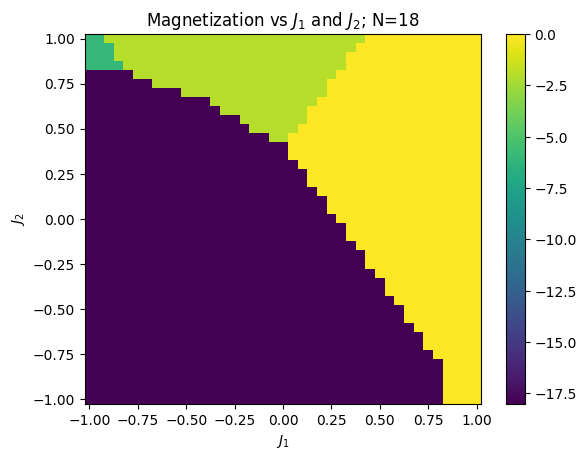

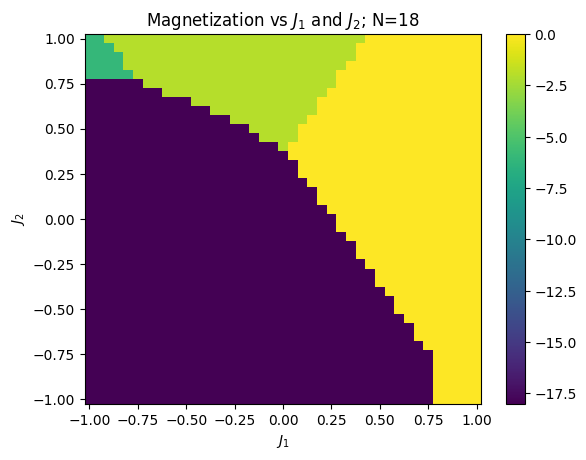

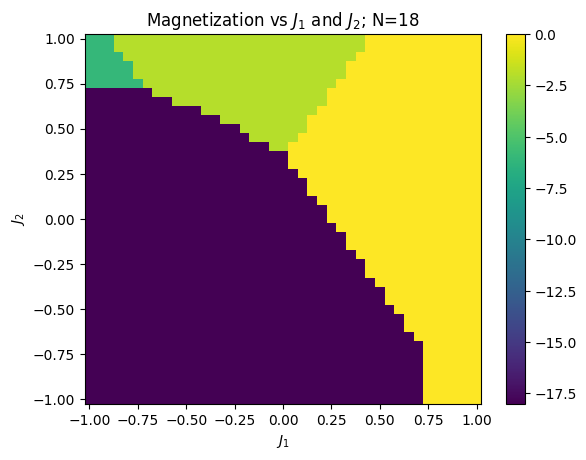

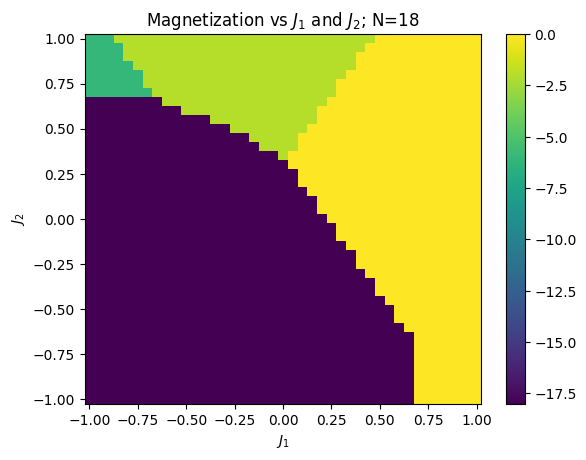

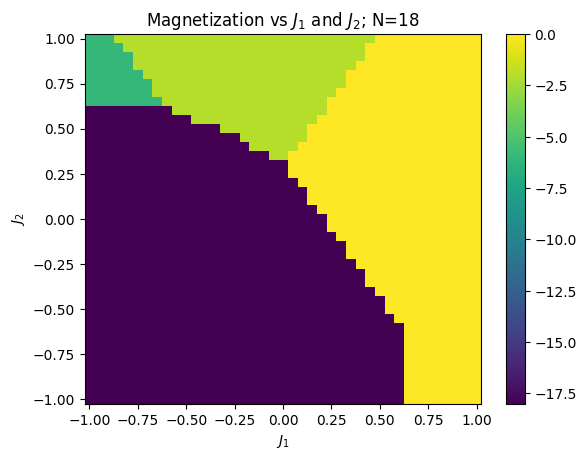

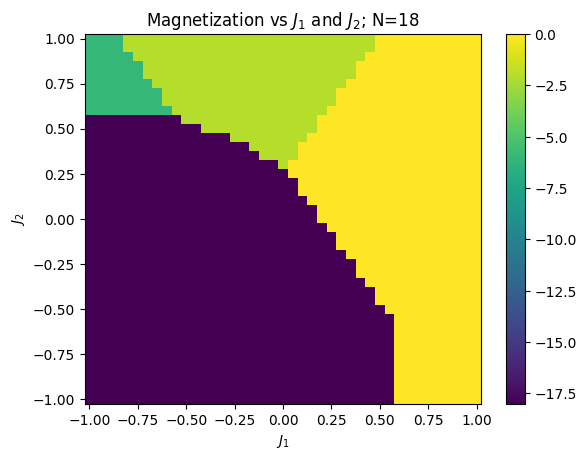

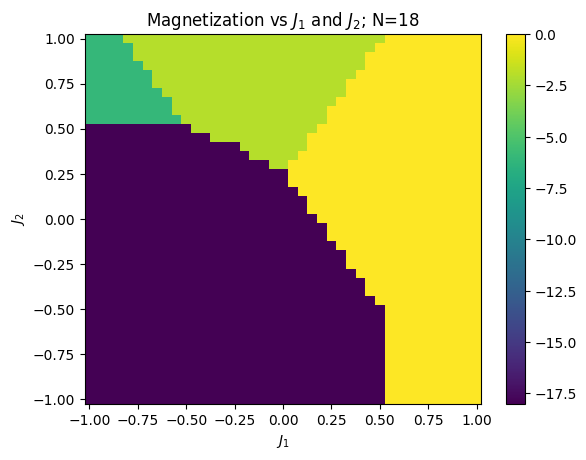

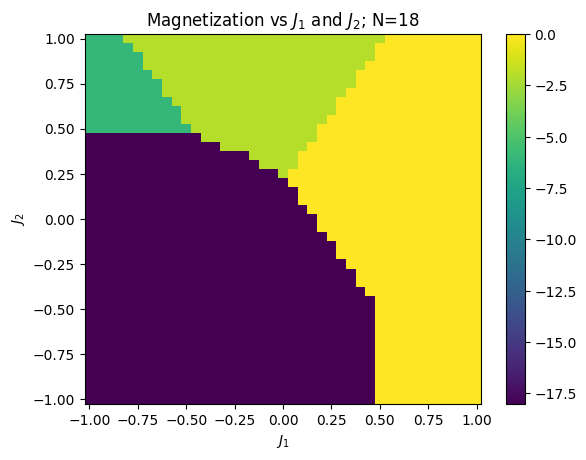

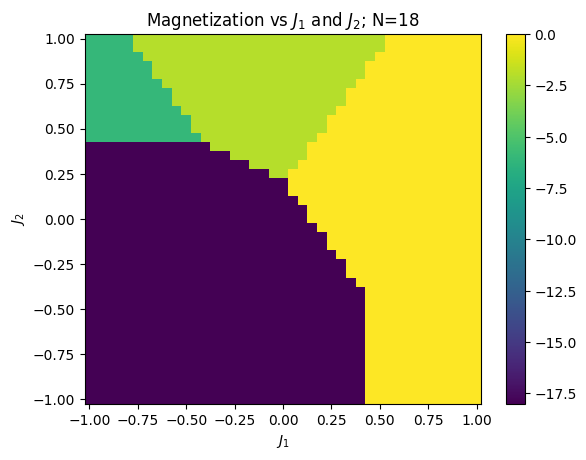

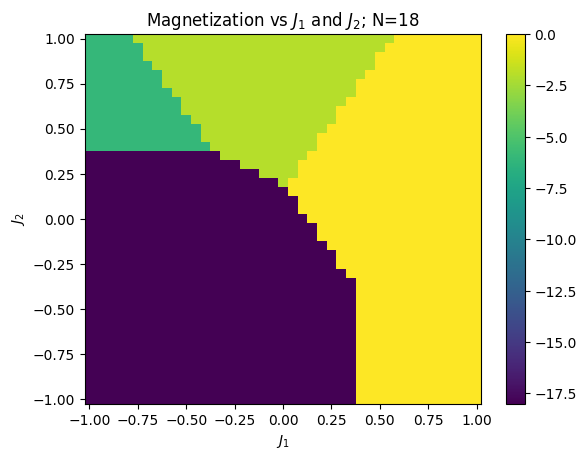

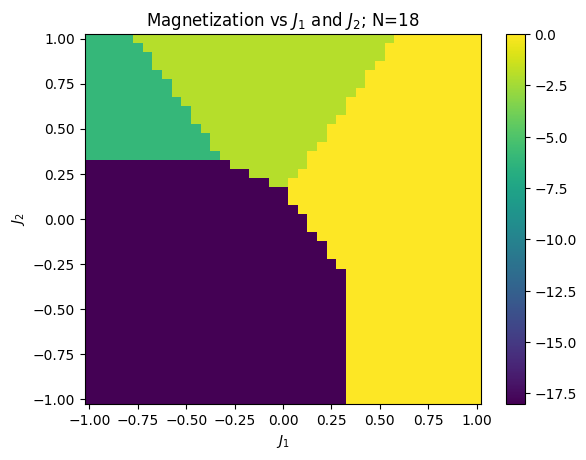

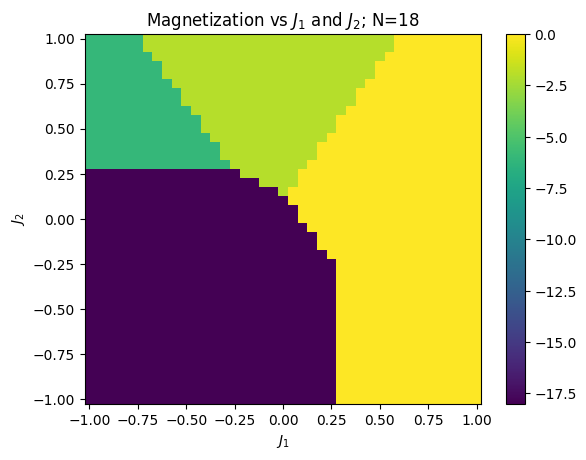

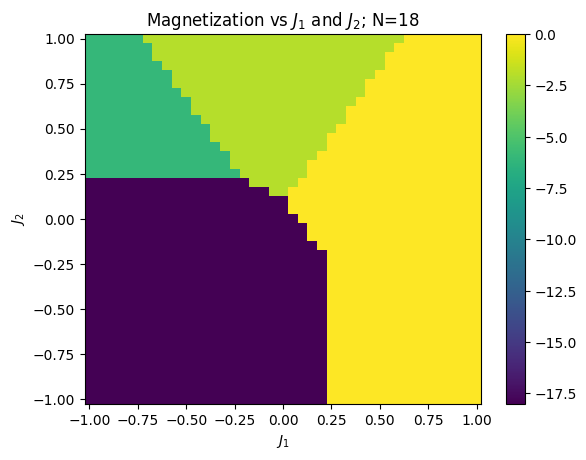

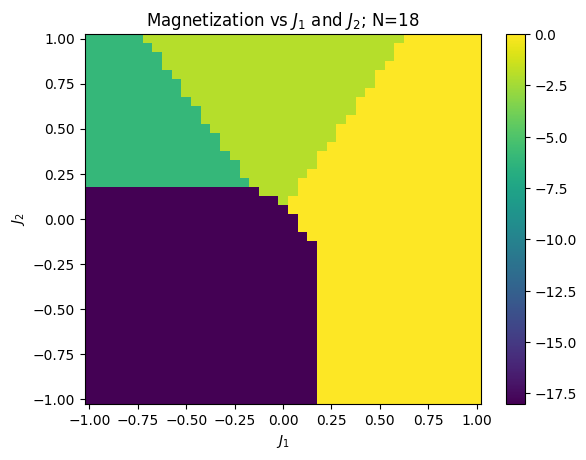

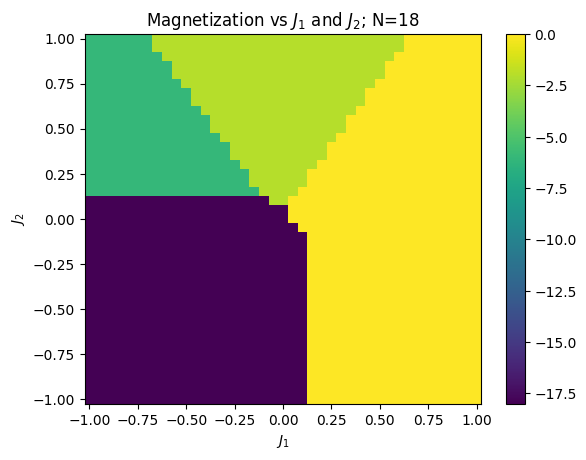

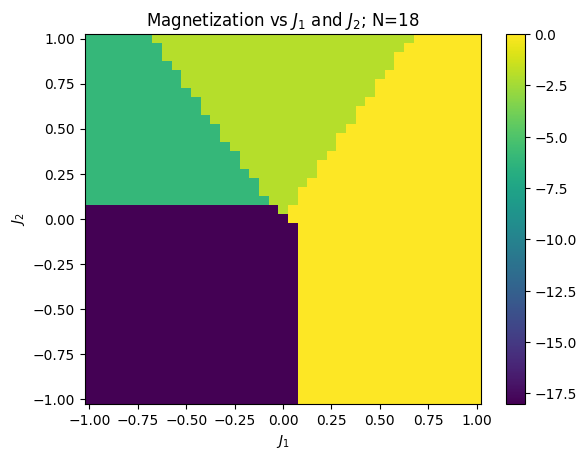

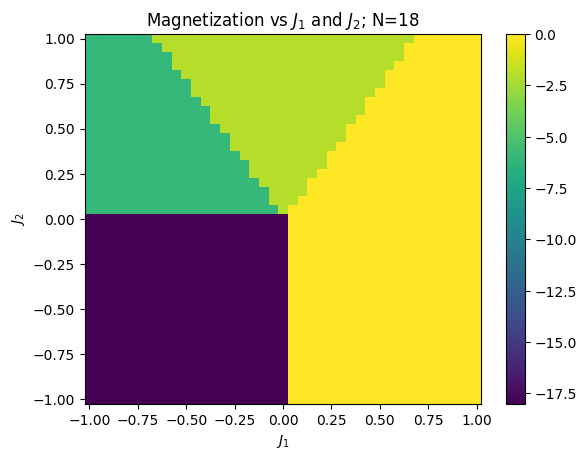

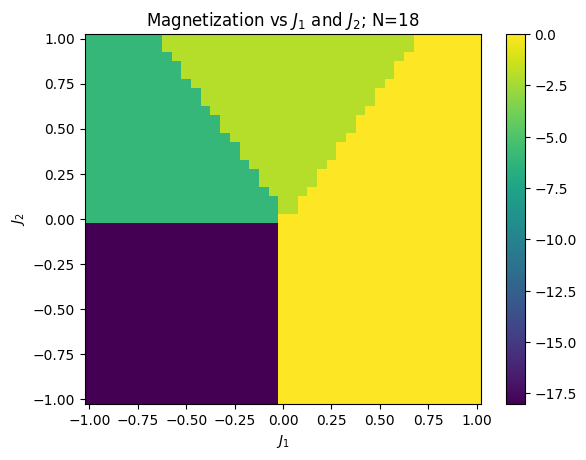

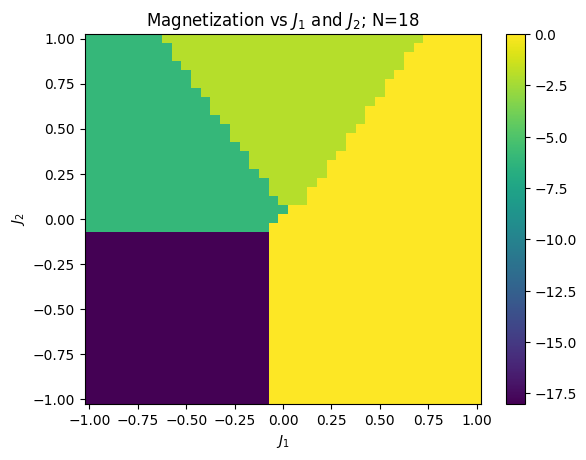

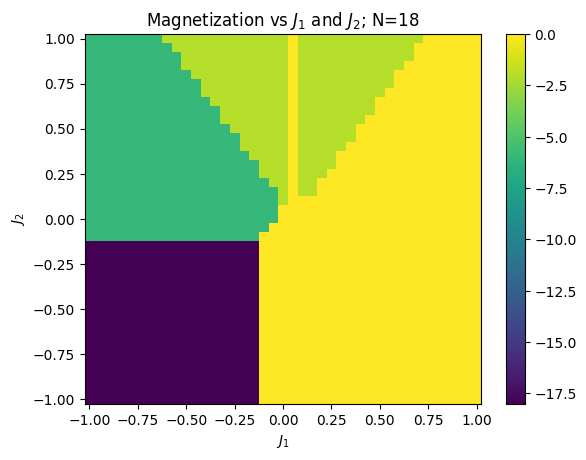

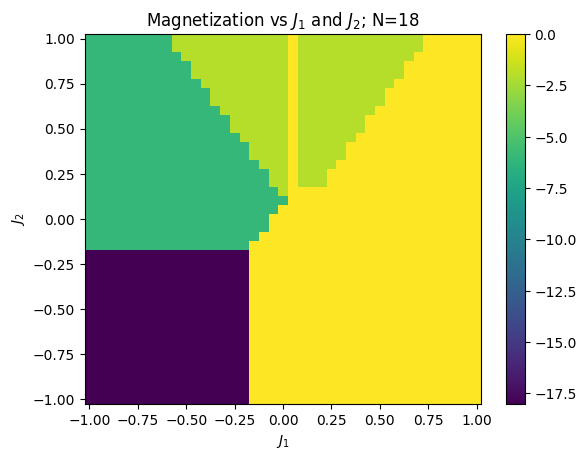

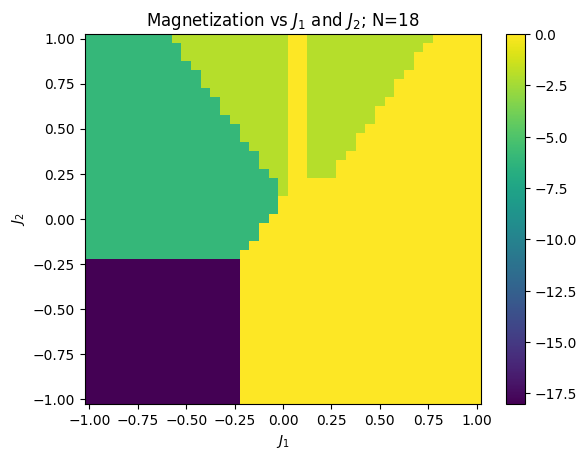

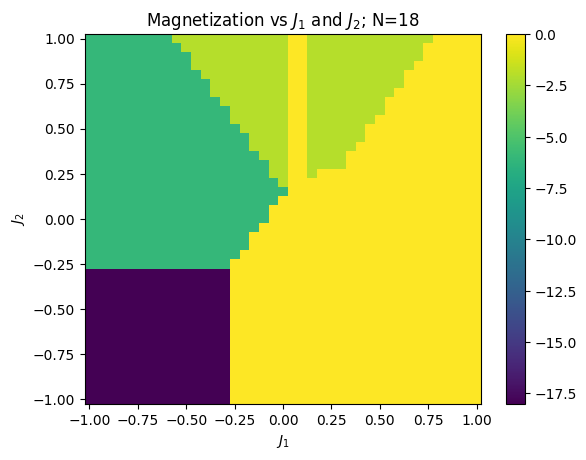

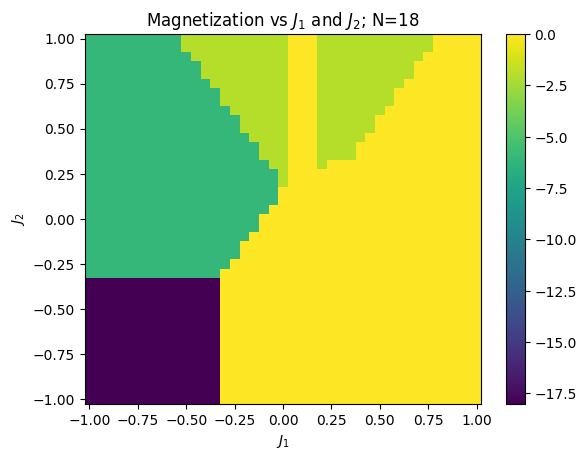

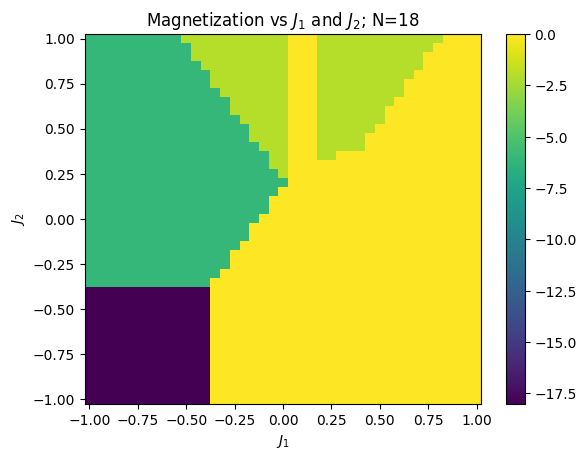

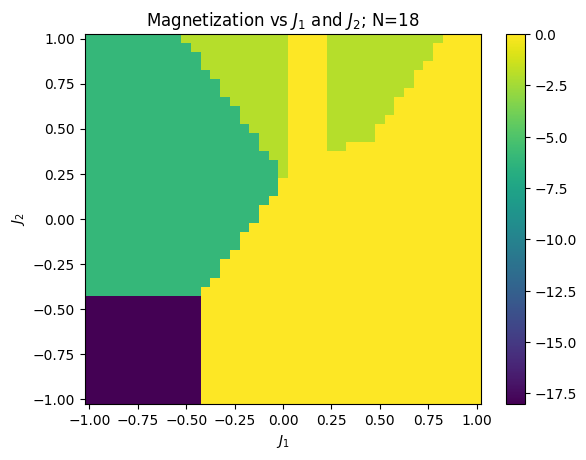

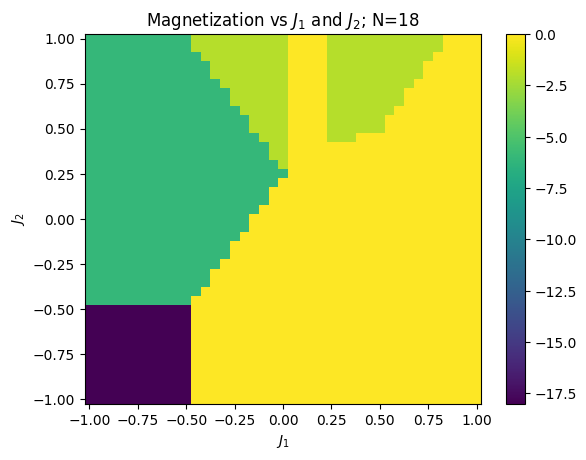

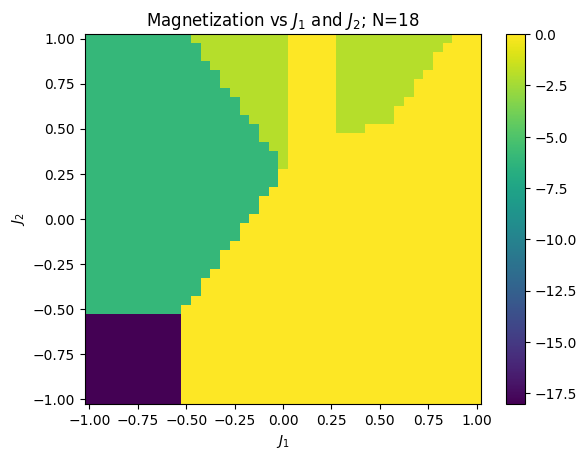

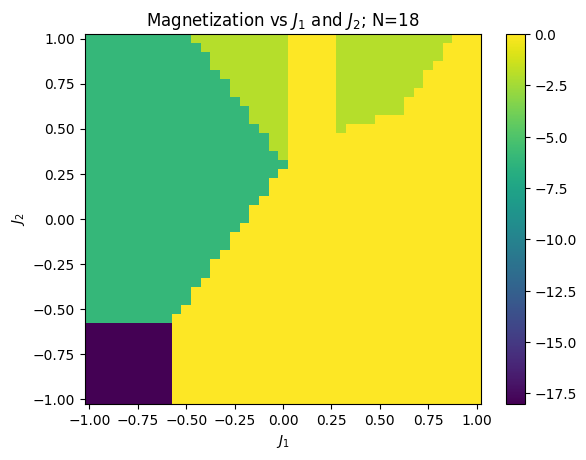

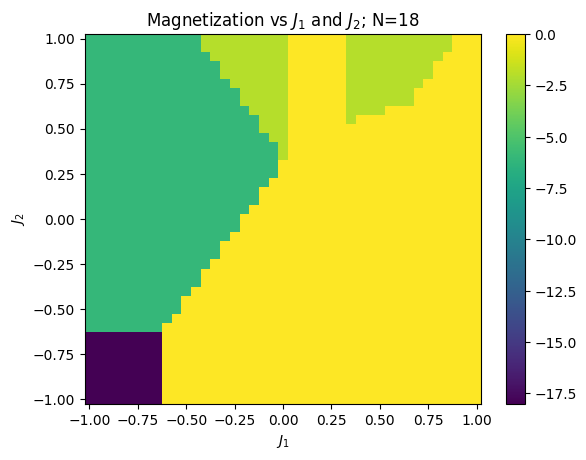

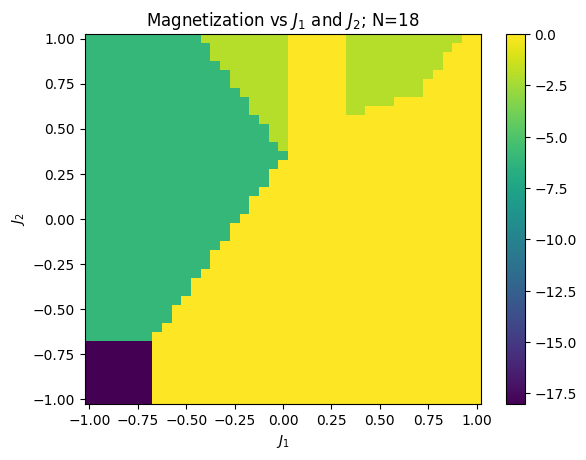

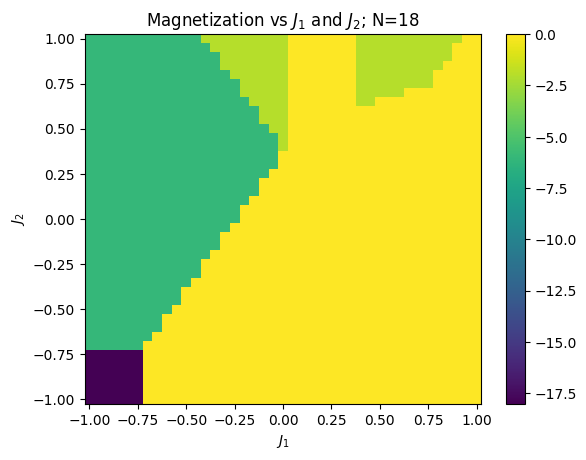

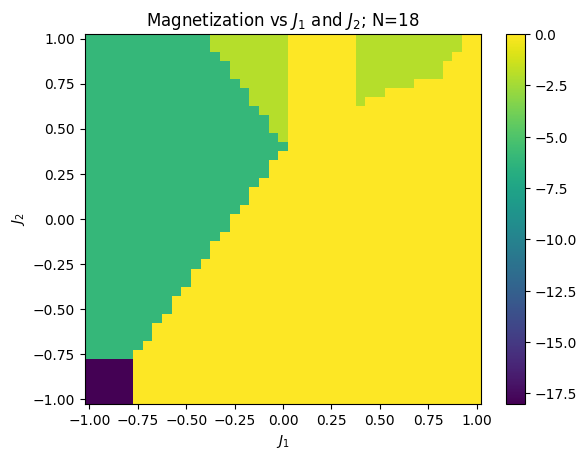

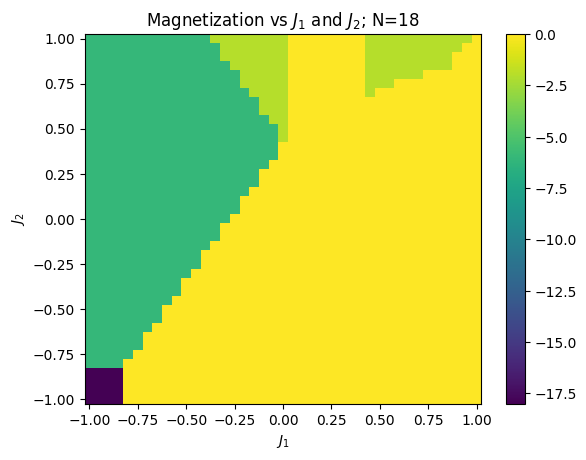

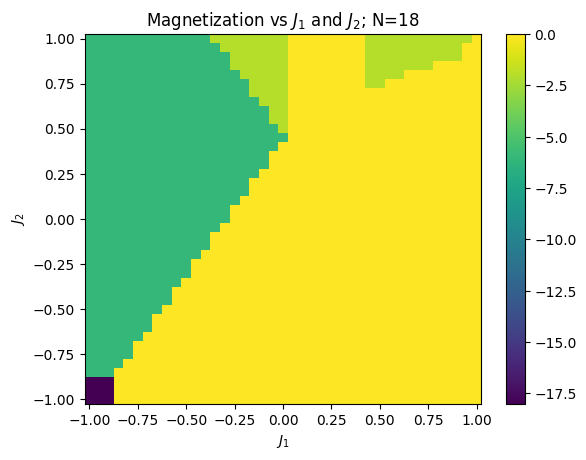

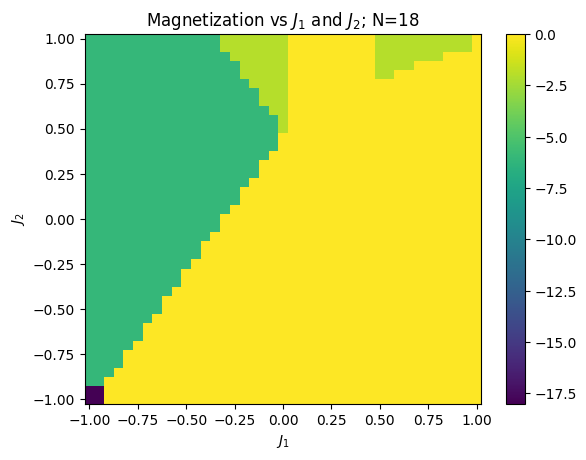

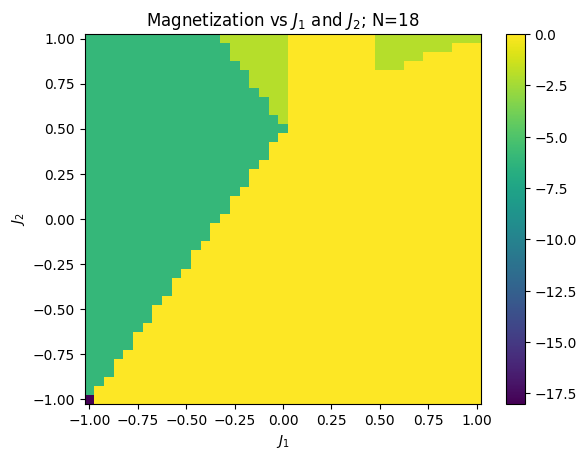

In [49]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = magnetization[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Magnetization vs $J_1$ and $J_2$; N=18")
    plt.show()

# N=50

In [51]:
energy_50 = np.zeros((41, 41, 41))
magnetization_50 = np.zeros((41, 41, 41))
Ny= 50
h = 0.01
for i in range(0,41):
    for j in range(0,41):
        for k in range(0,41):
            j_1 = -1 + 0.05*i
            j_2 = -1 + 0.05*j
            j_3 = -1 + 0.05*k
            energy_1, spin_1, magnetization_1 = ising_model_3NN(Ny, h, j_1, j_2, j_3)
            energy_50[i][j][k] = energy_1
            magnetization_50[i][j][k] = magnetization_1


#### Here we plot Energies and magnetizations w.r.t $J_1$ and $J_2$ varying $J_3 = -1$ to $J_3 = 1$. 

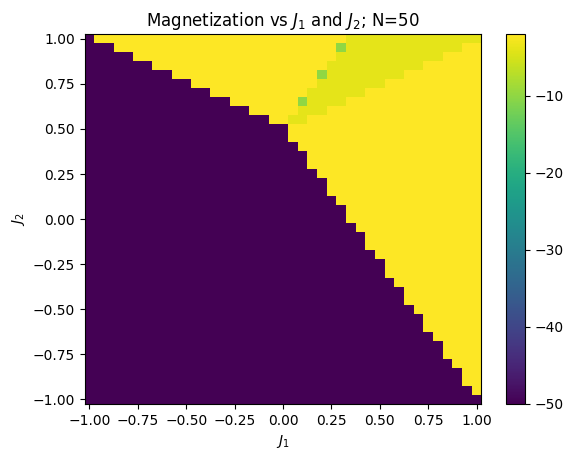

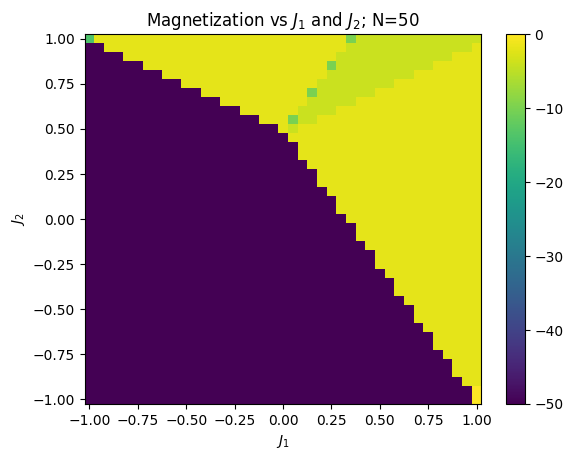

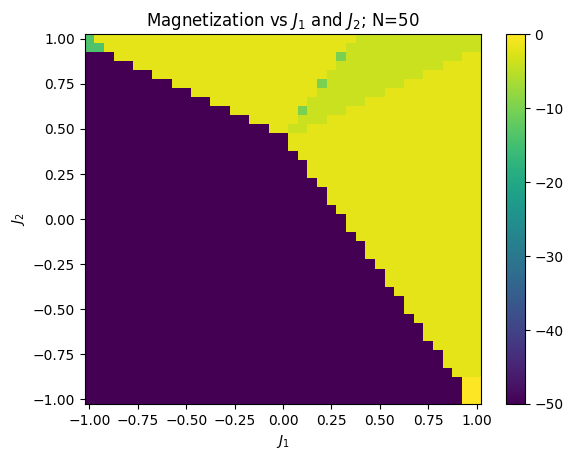

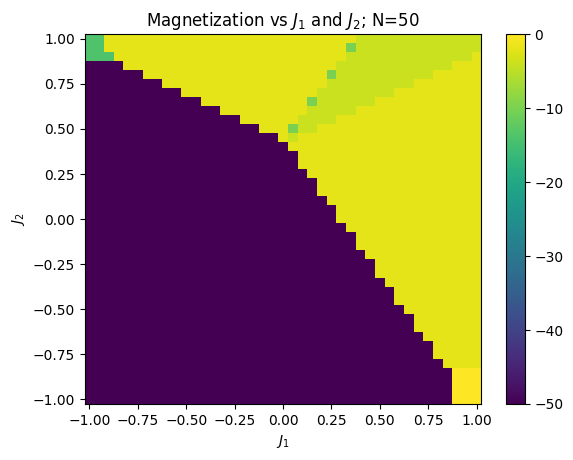

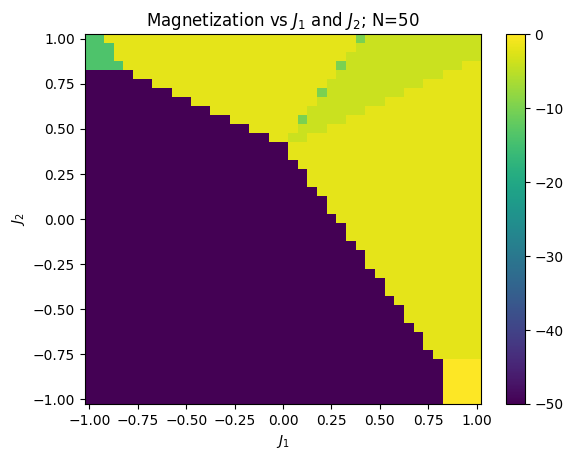

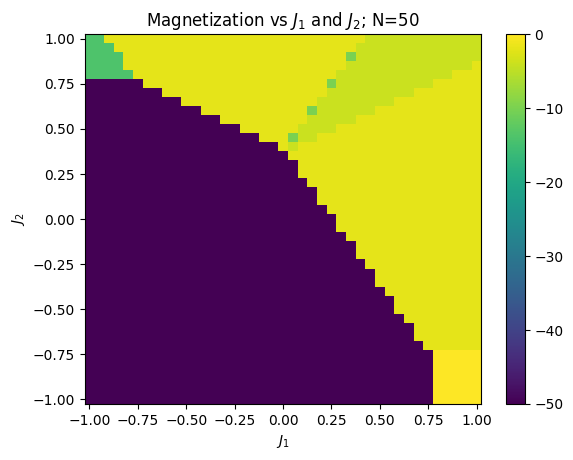

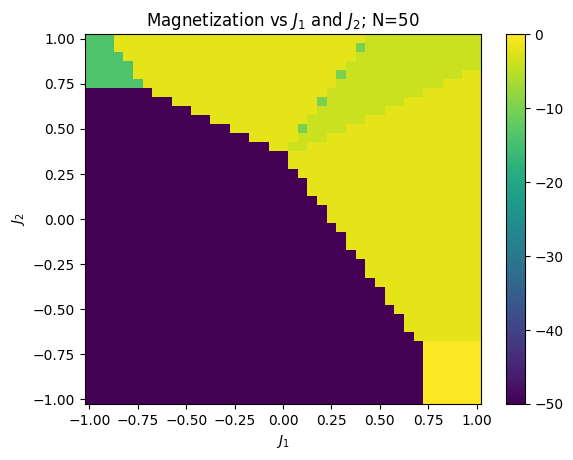

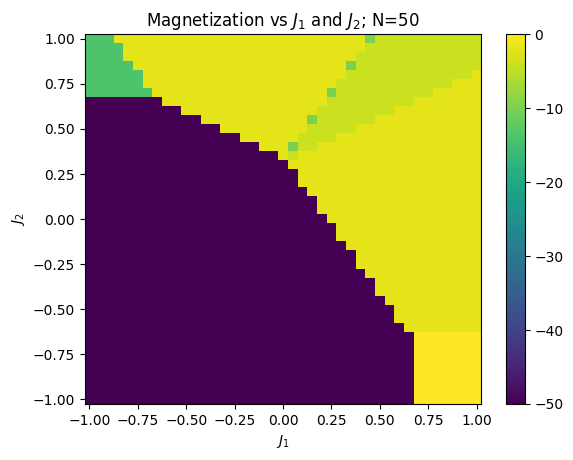

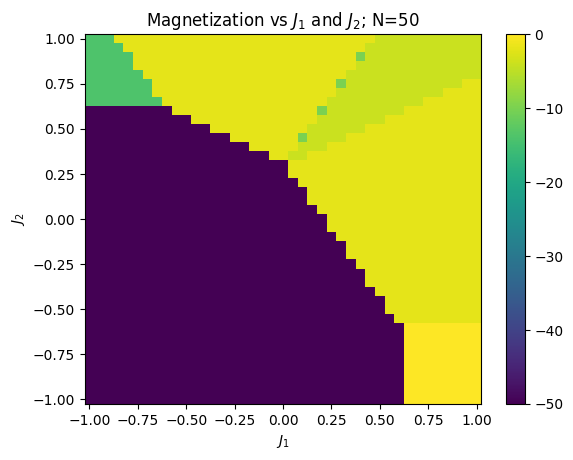

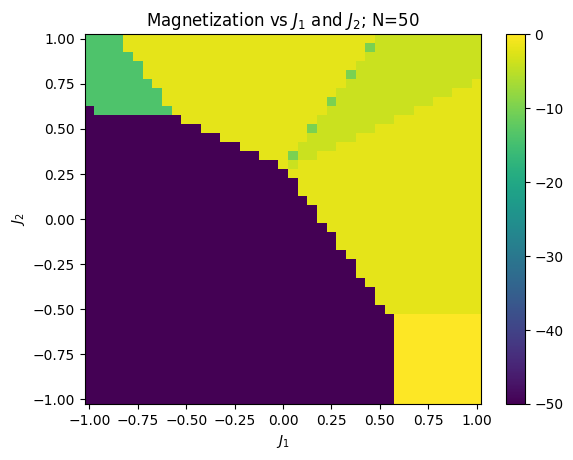

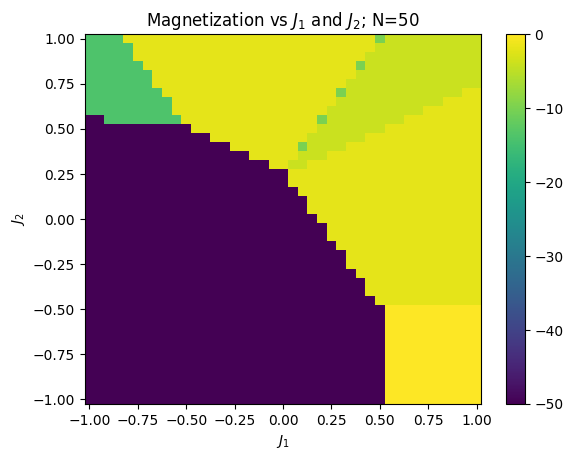

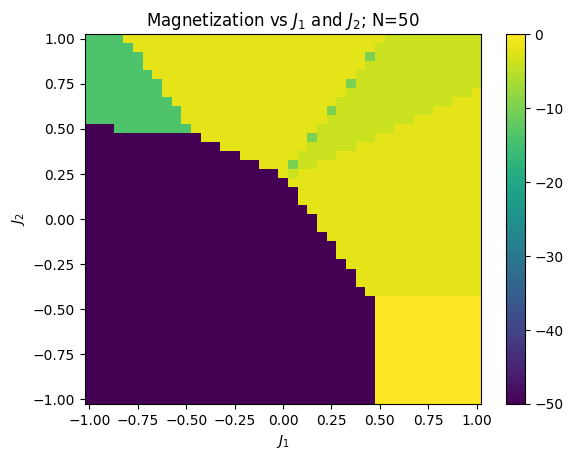

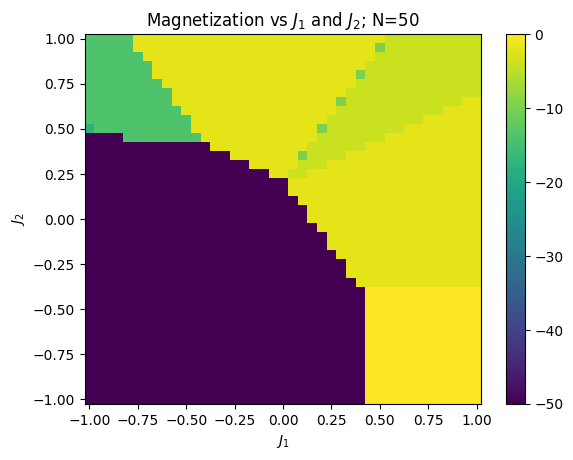

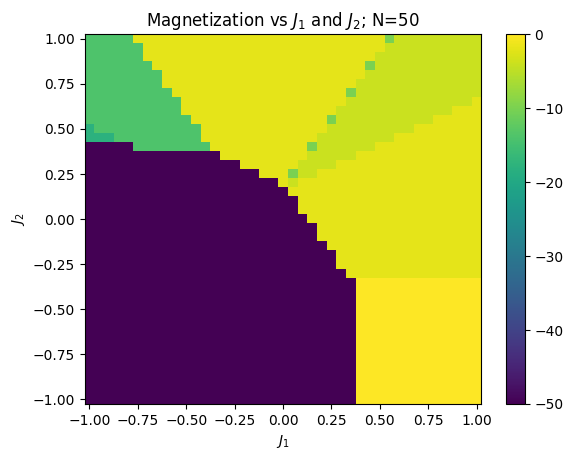

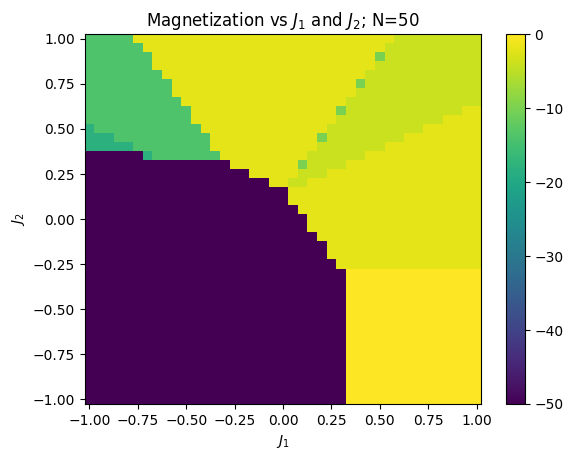

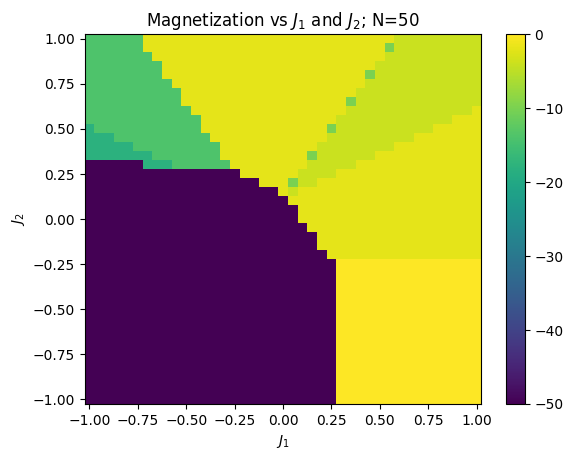

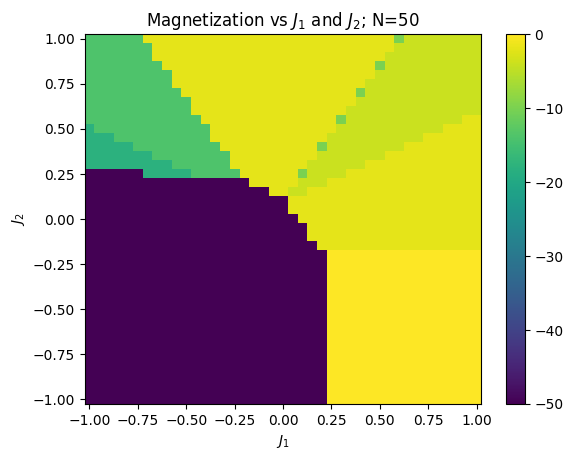

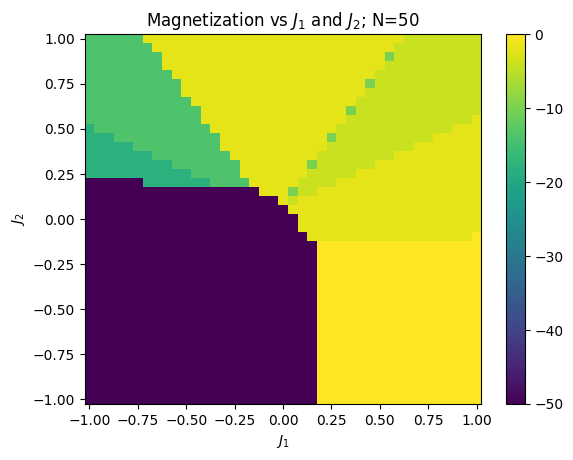

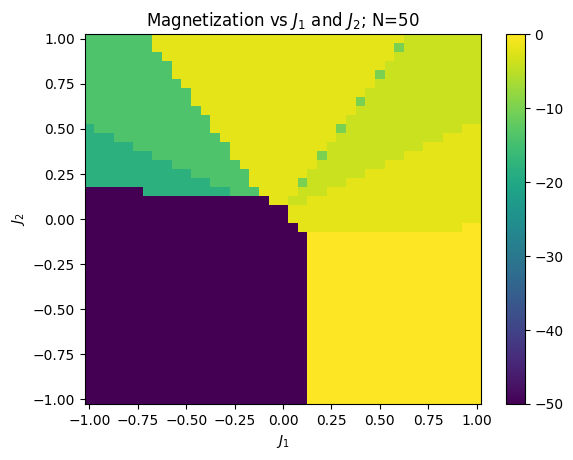

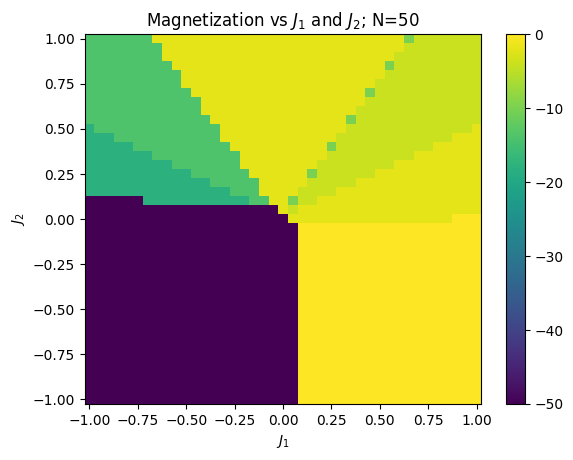

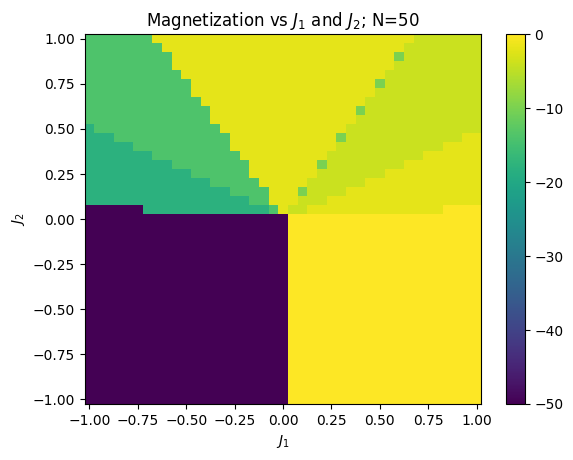

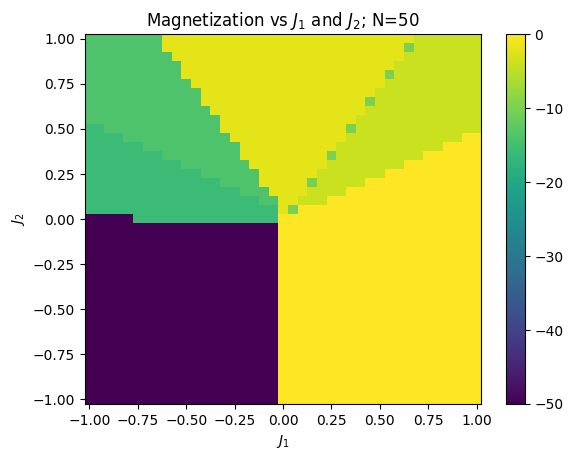

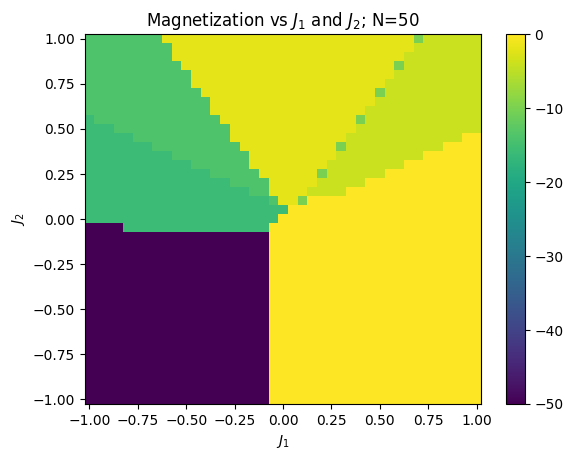

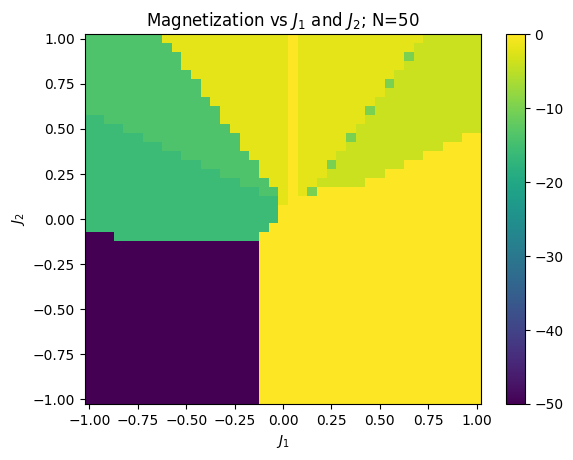

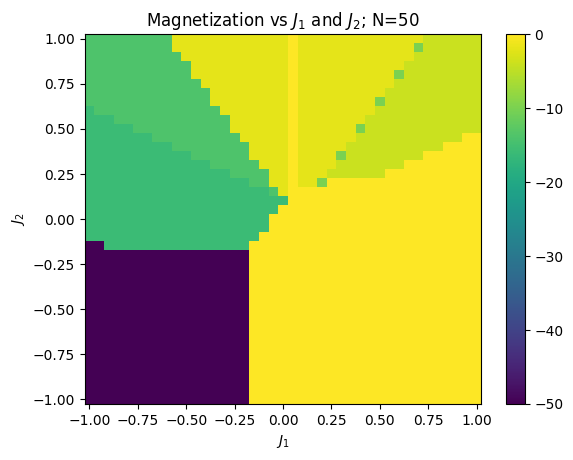

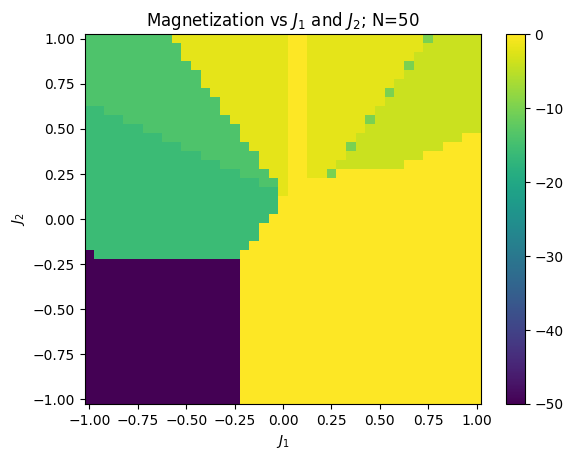

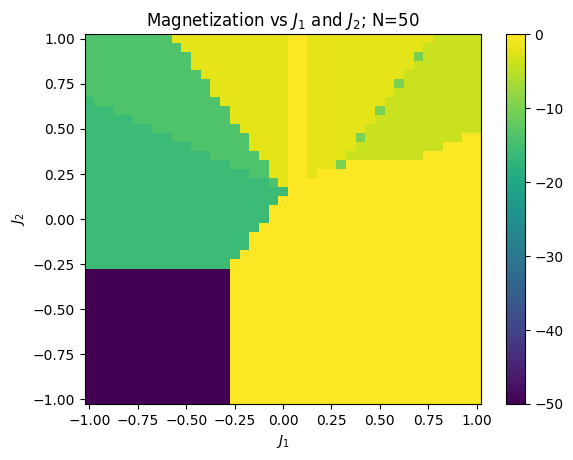

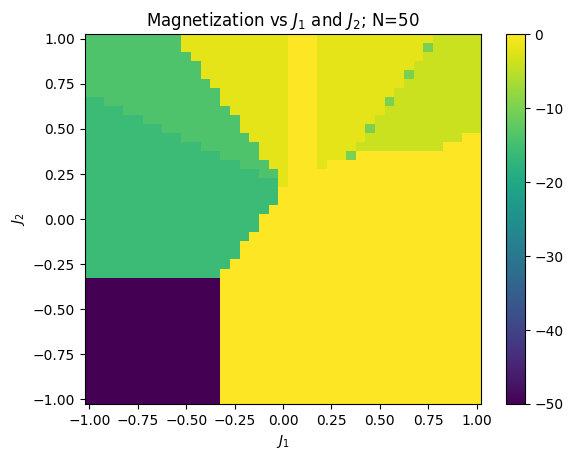

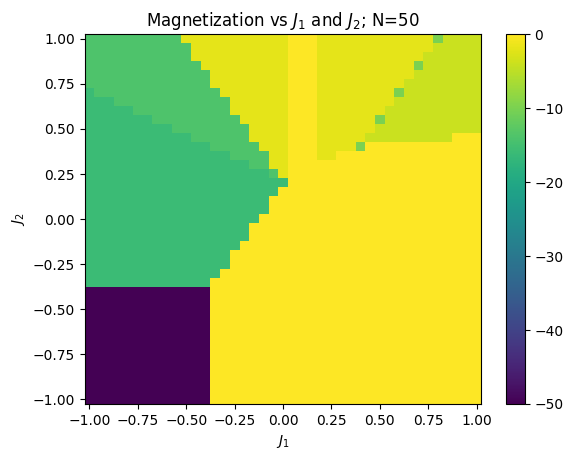

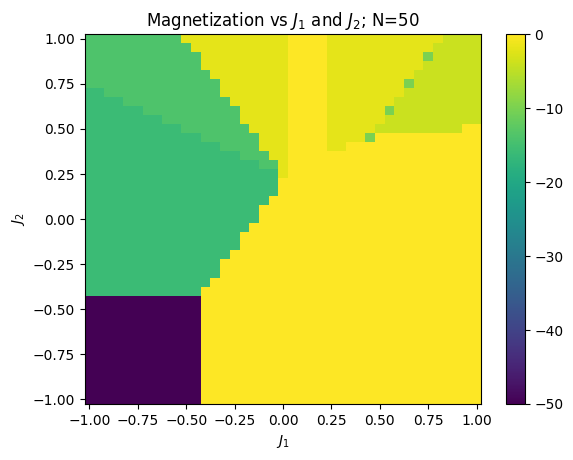

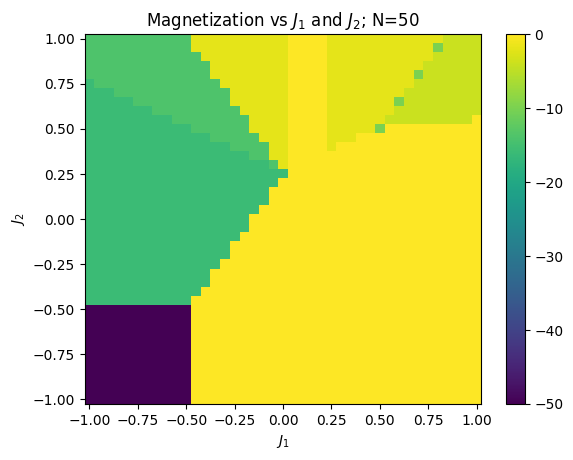

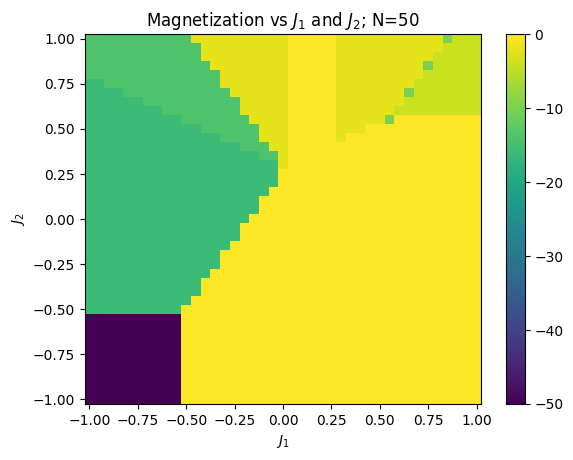

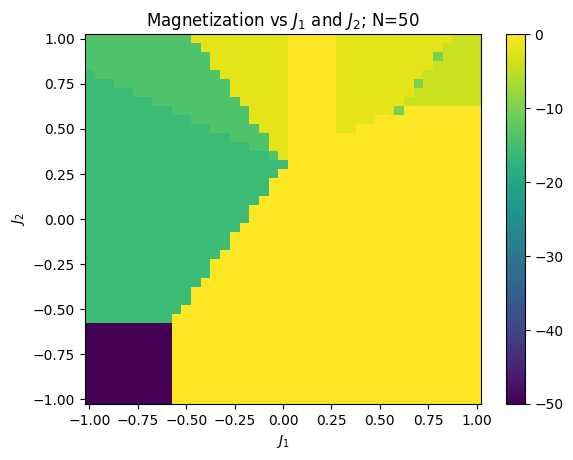

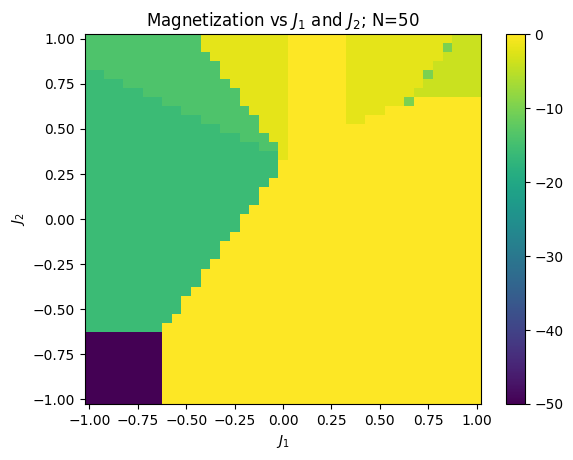

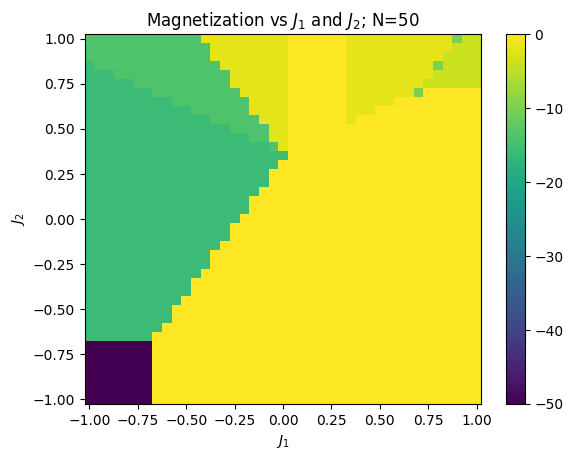

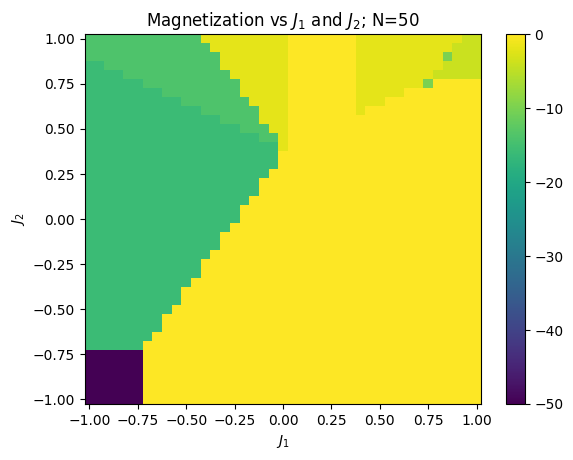

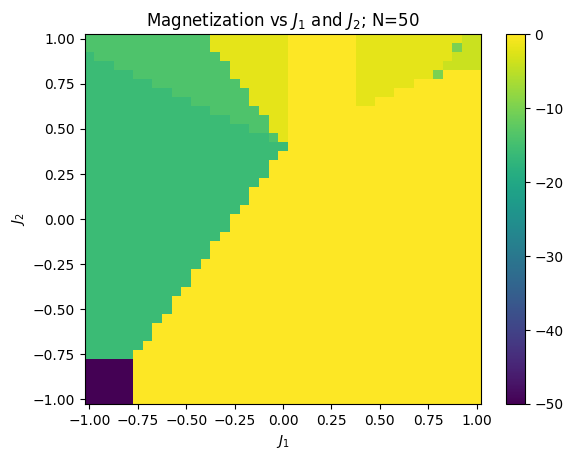

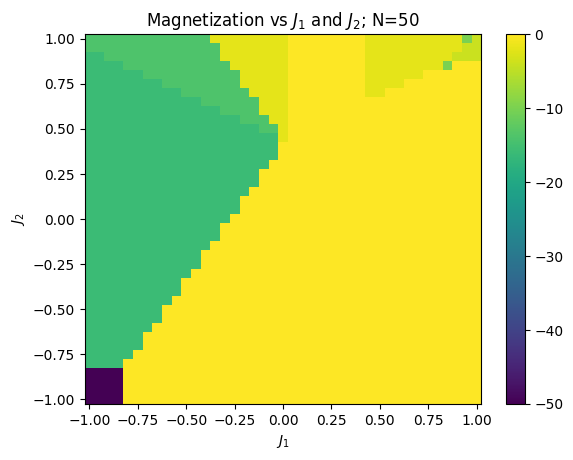

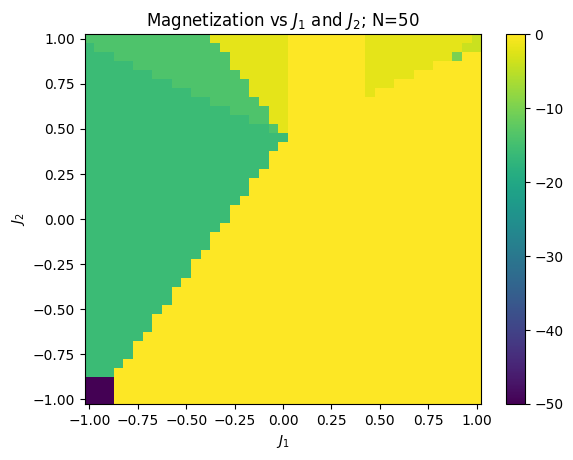

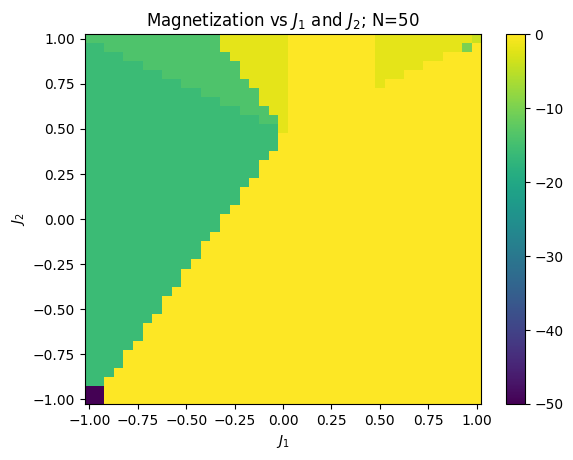

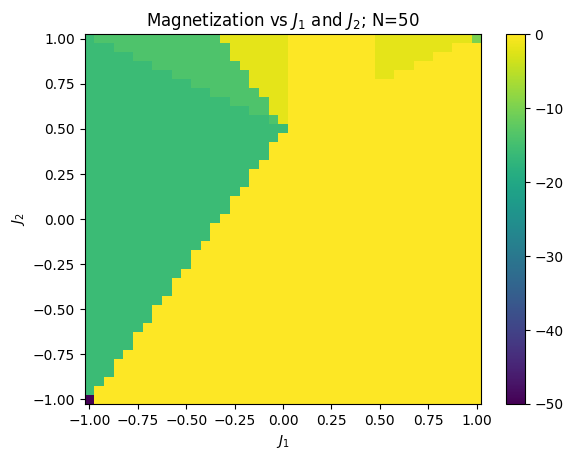

In [52]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = magnetization_50[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Magnetization vs $J_1$ and $J_2$; N=50")
    plt.show()

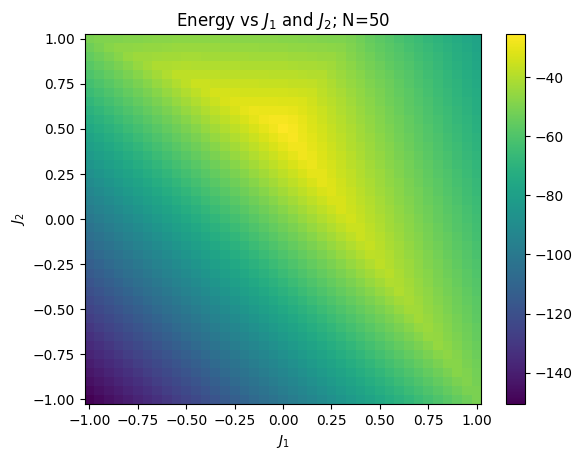

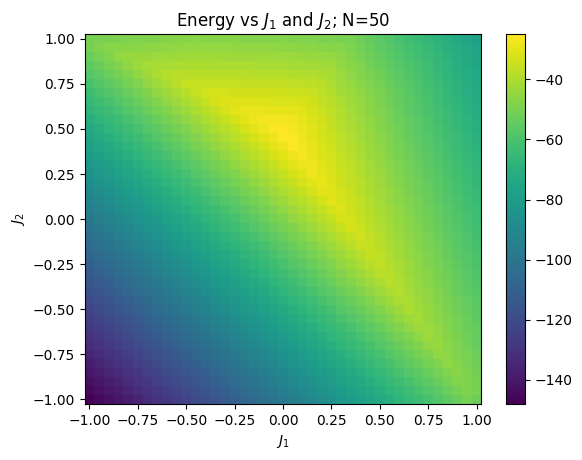

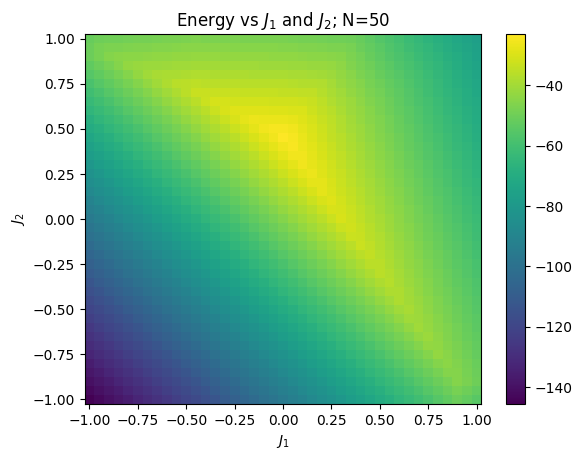

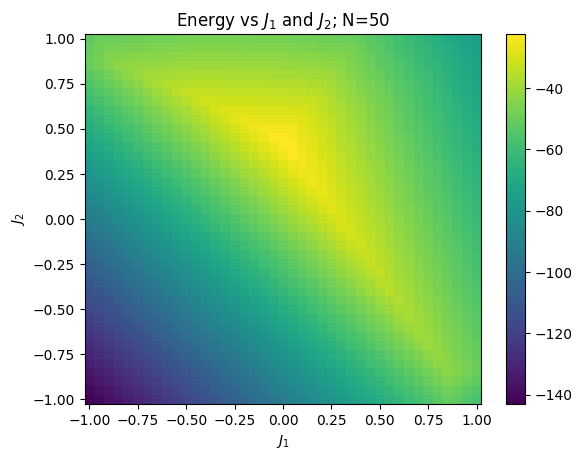

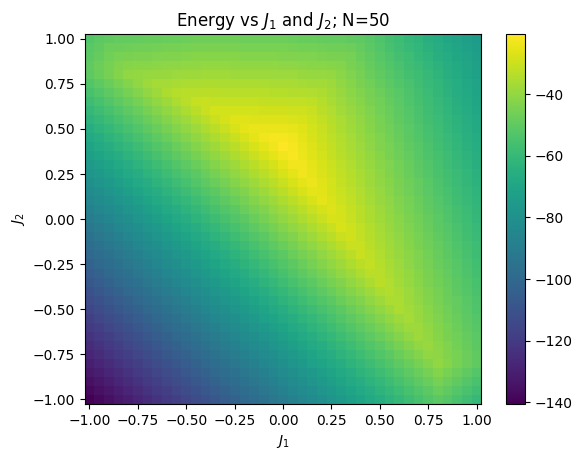

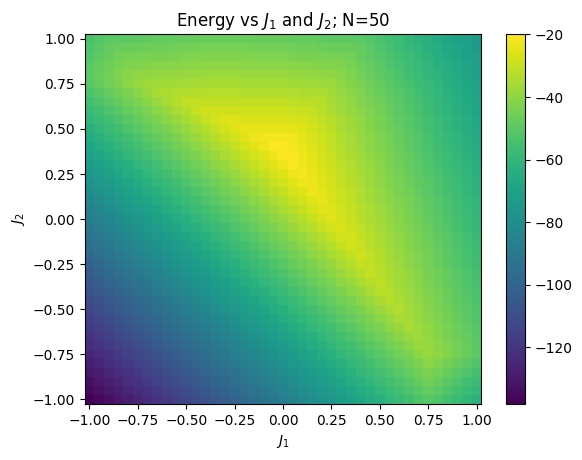

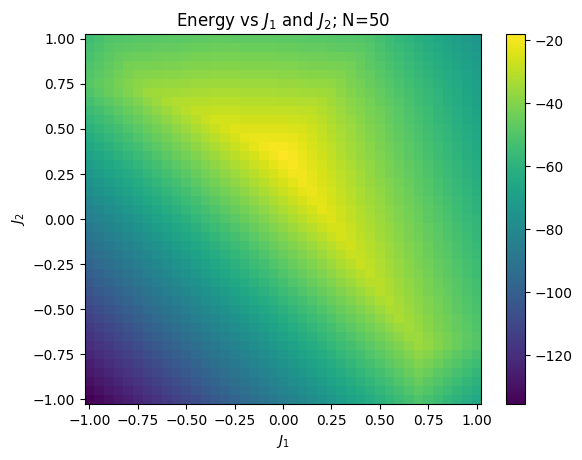

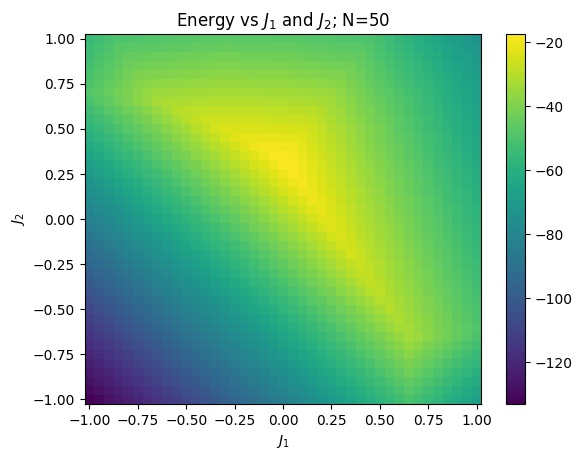

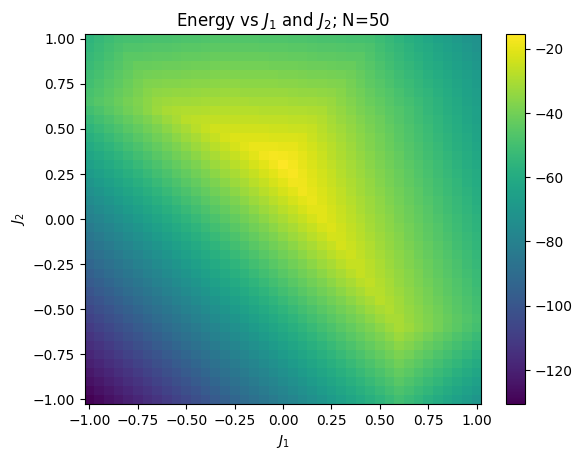

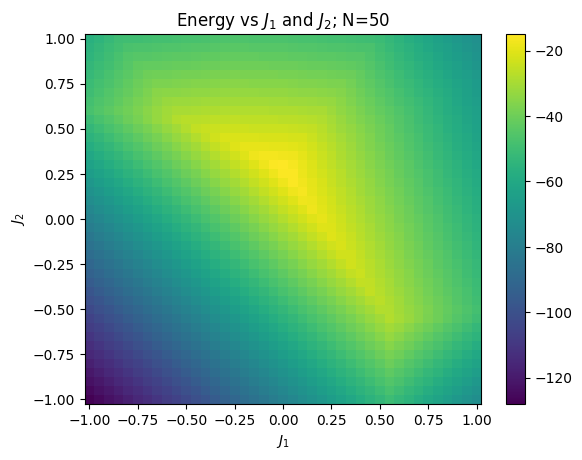

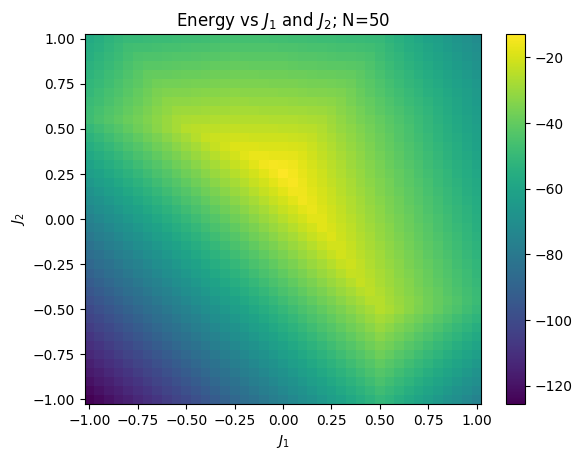

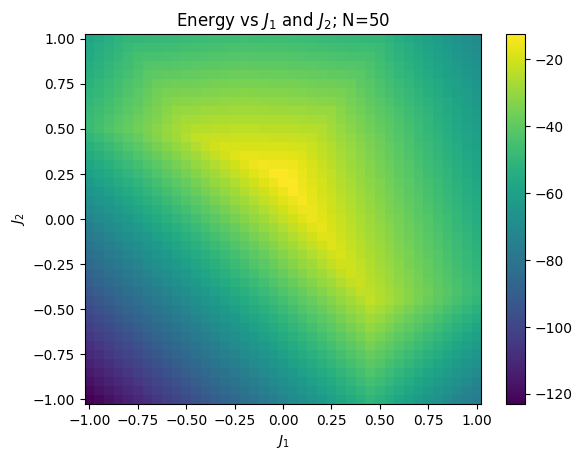

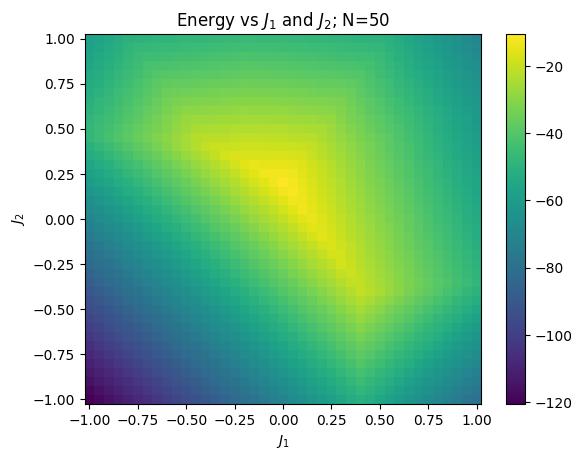

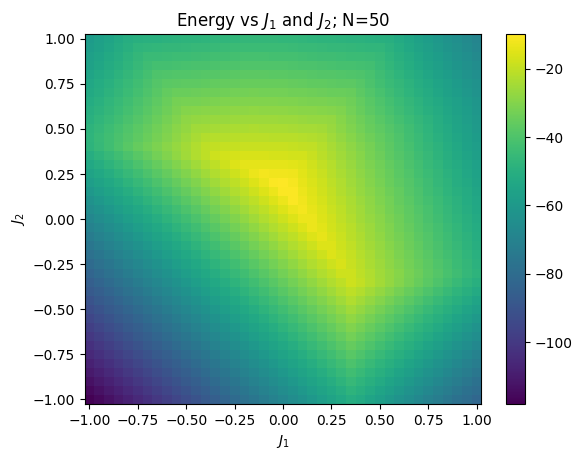

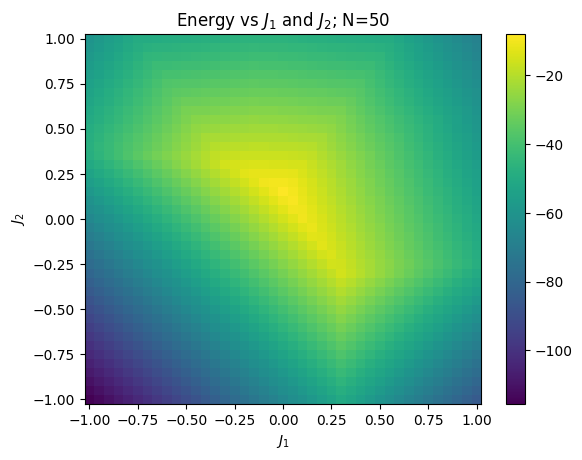

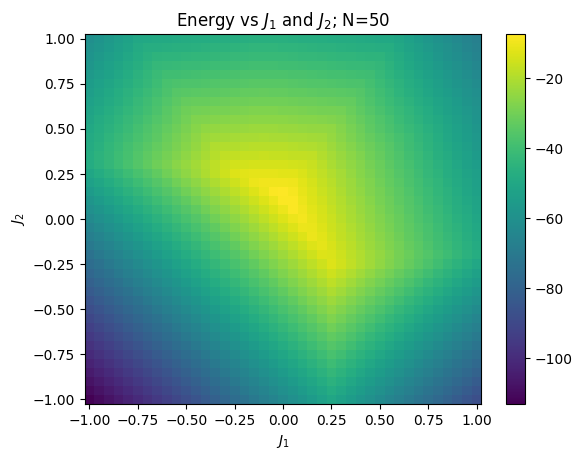

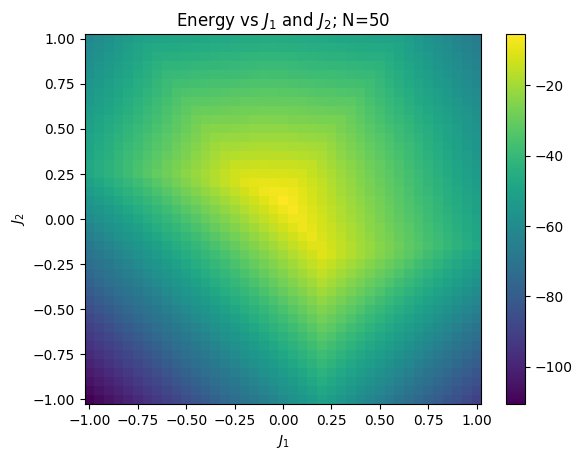

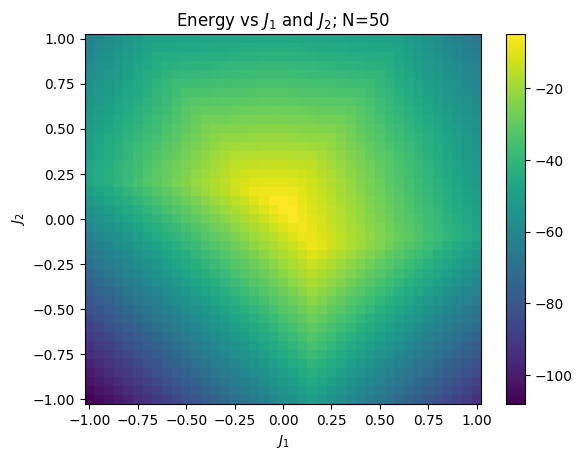

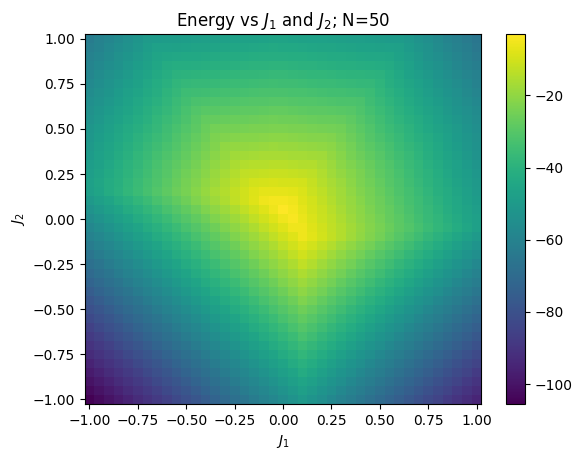

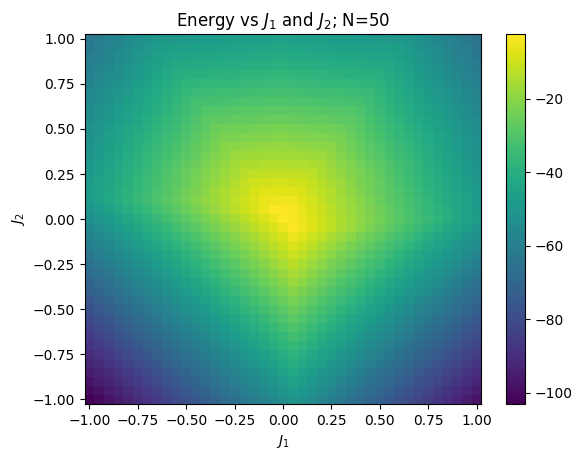

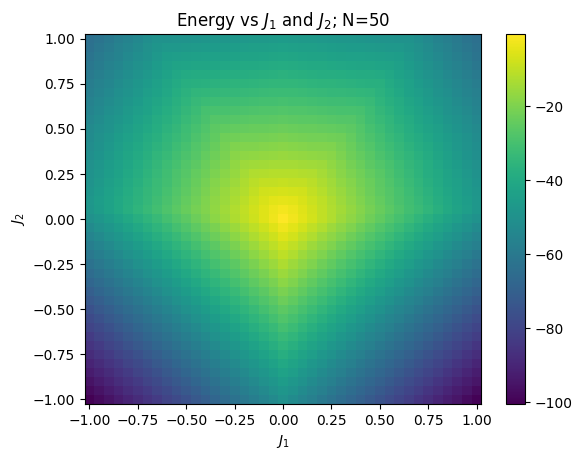

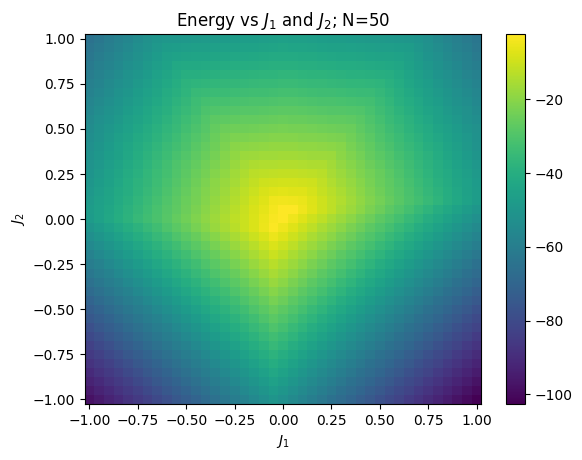

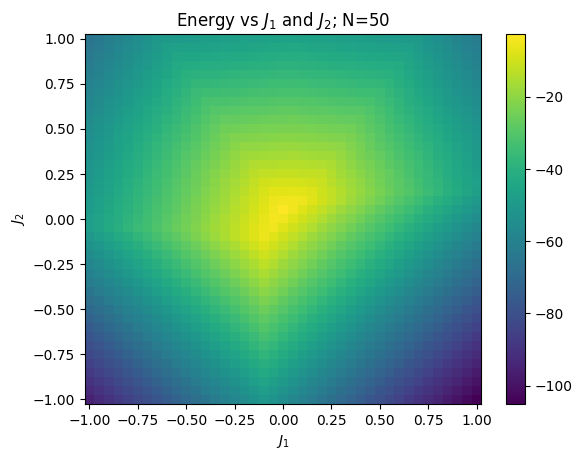

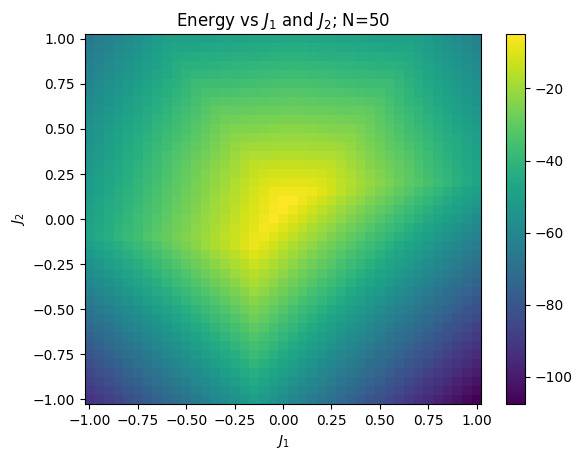

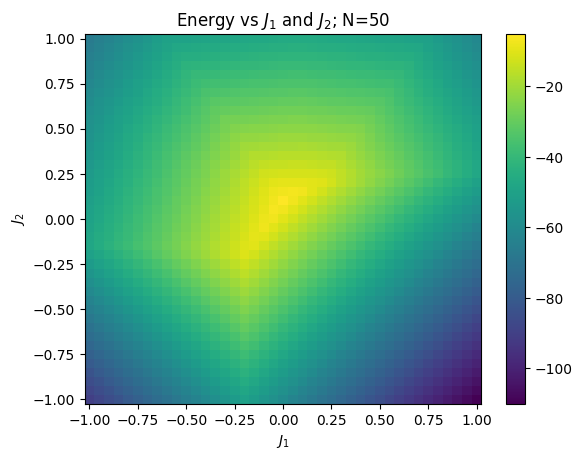

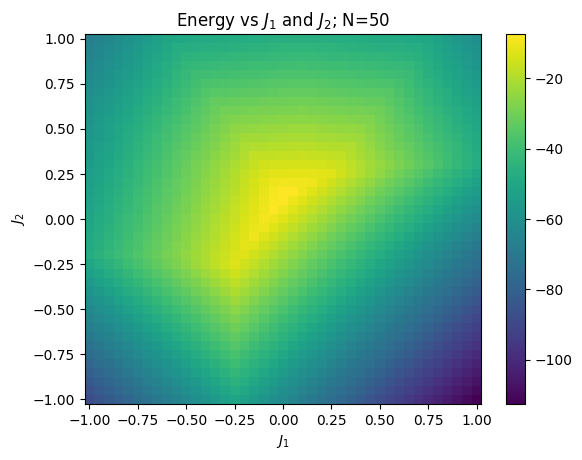

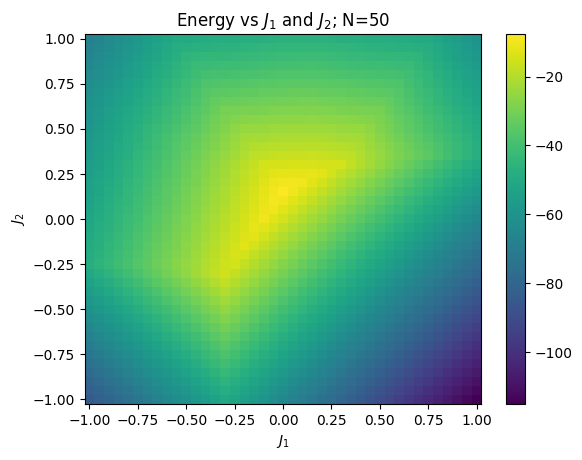

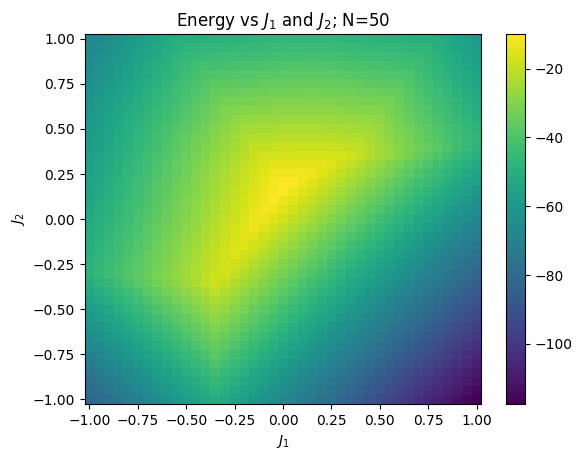

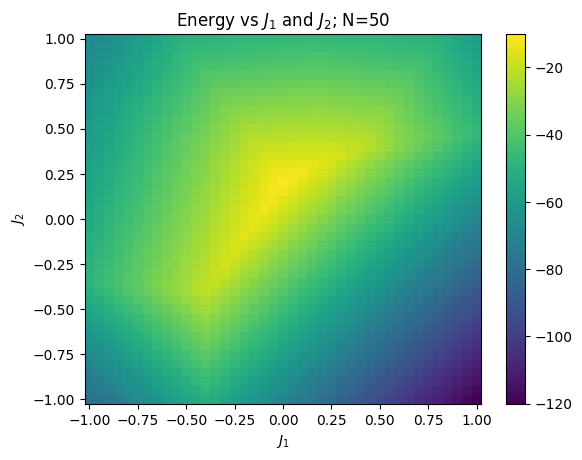

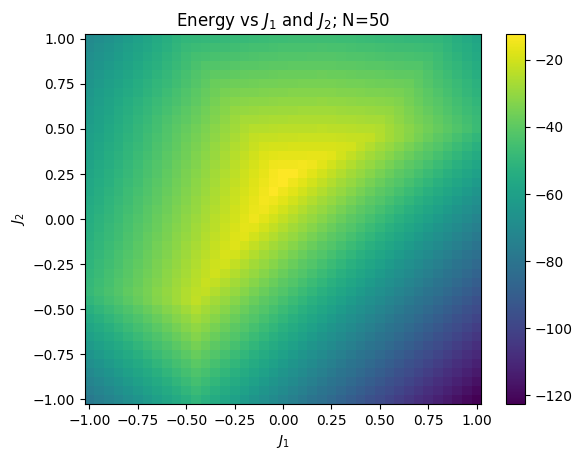

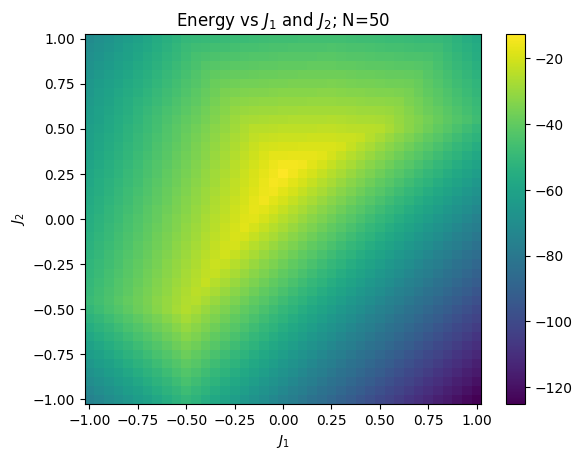

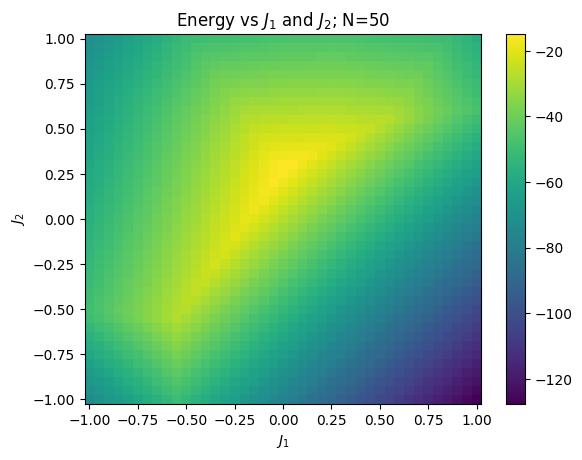

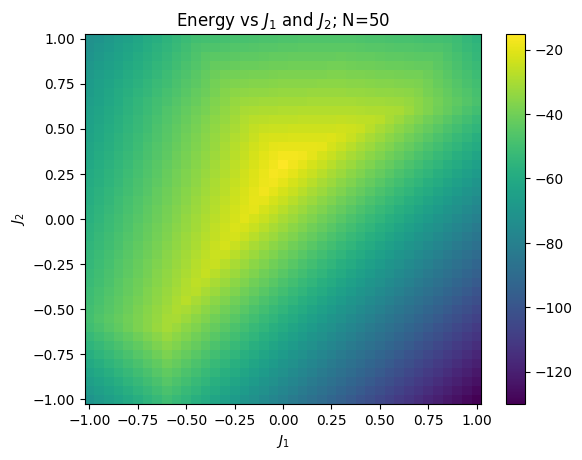

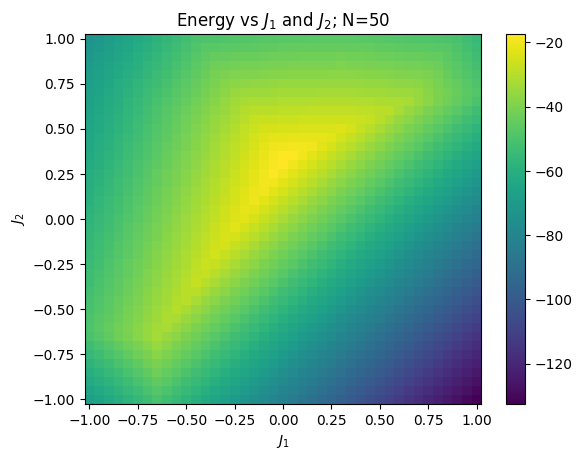

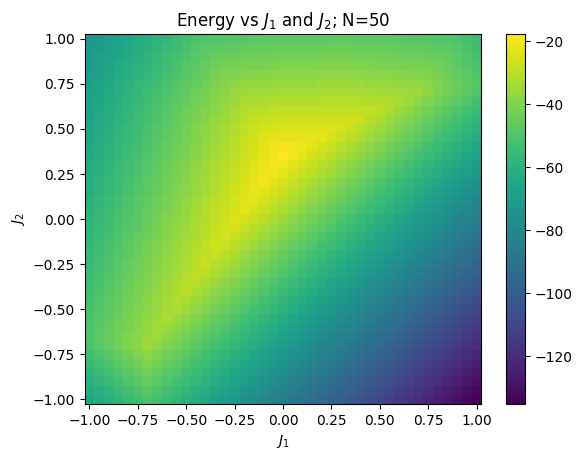

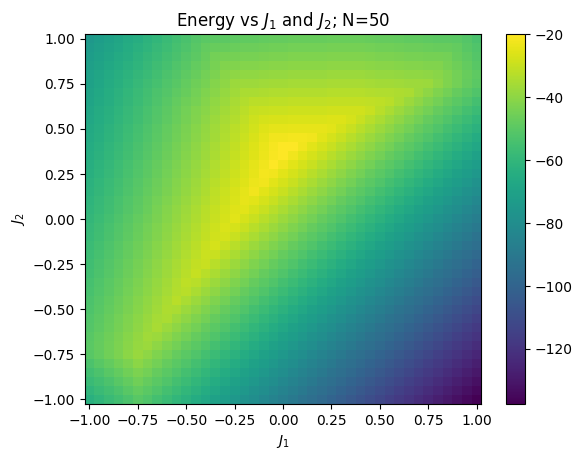

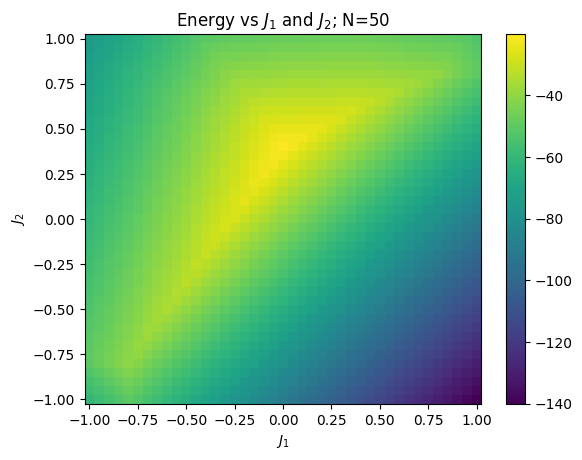

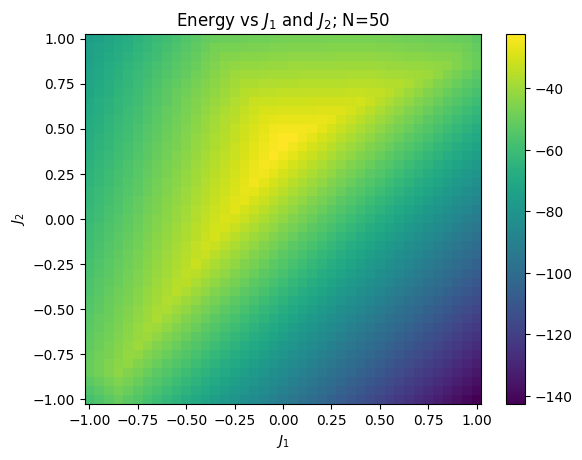

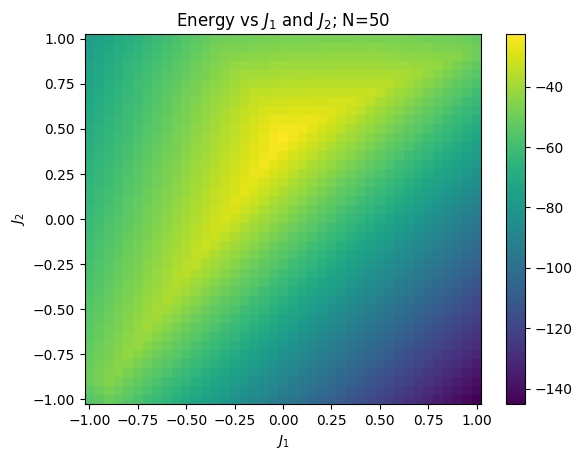

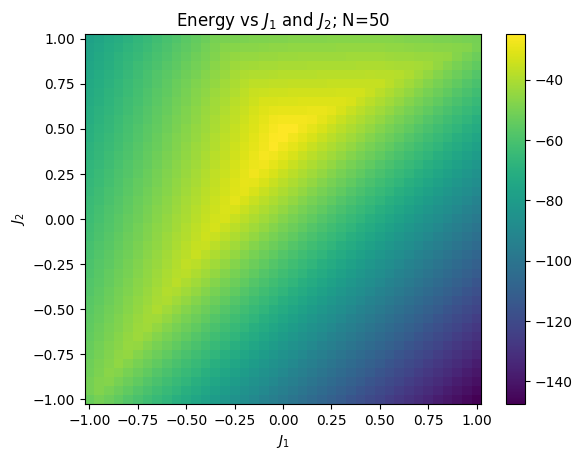

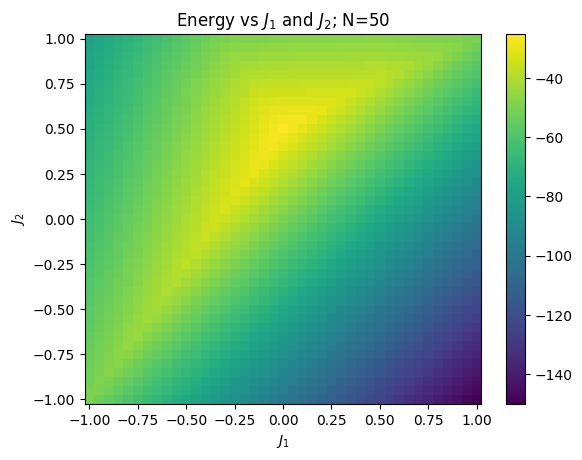

In [60]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = energy_50[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Energy vs $J_1$ and $J_2$; N=50")
    plt.show()

# N = 30

In [54]:
energy_30 = np.zeros((41, 41, 41))
magnetization_30 = np.zeros((41, 41, 41))
Ny= 30
h = 0.01
for i in range(0,41):
    for j in range(0,41):
        for k in range(0,41):
            j_1 = -1 + 0.05*i
            j_2 = -1 + 0.05*j
            j_3 = -1 + 0.05*k
            energy_1, spin_1, magnetization_1 = ising_model_3NN(Ny, h, j_1, j_2, j_3)
            energy_30[i][j][k] = energy_1
            magnetization_30[i][j][k] = magnetization_1


#### Here we plot Energies and magnetizations w.r.t $J_1$ and $J_2$ varying $J_3 = -1$ to $J_3 = 1$. 

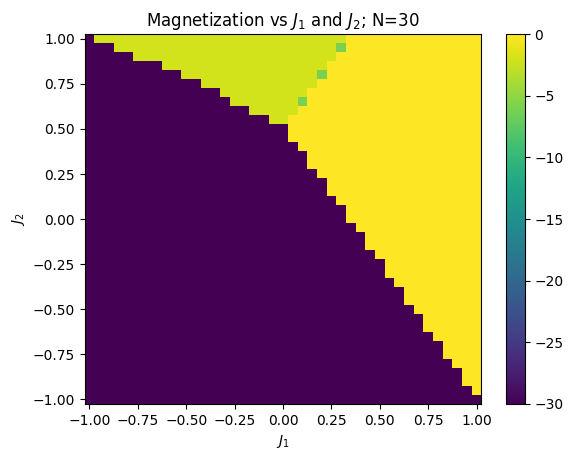

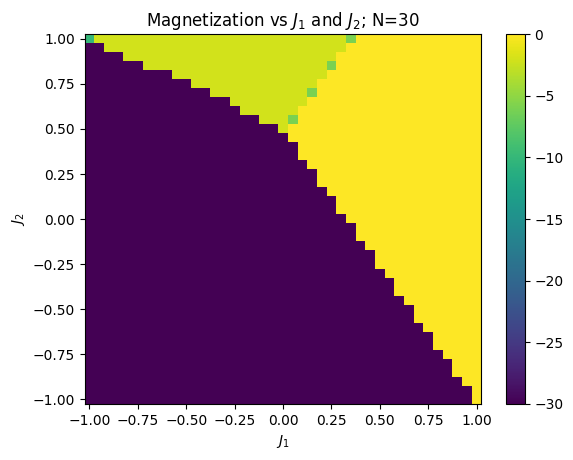

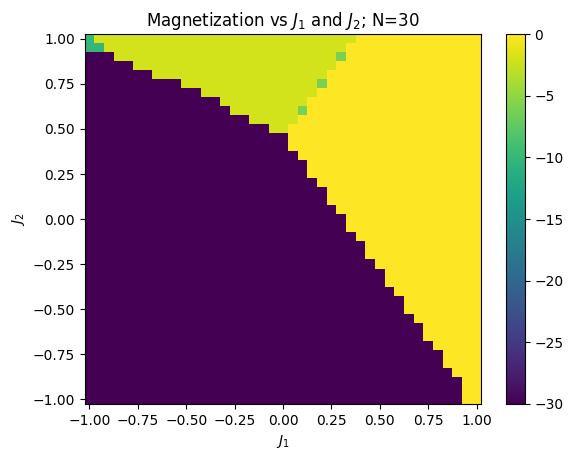

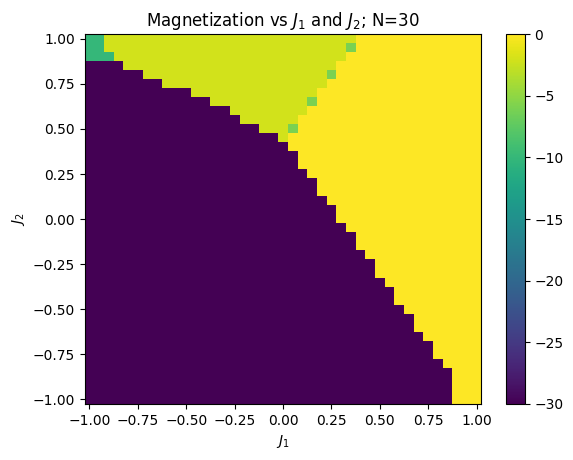

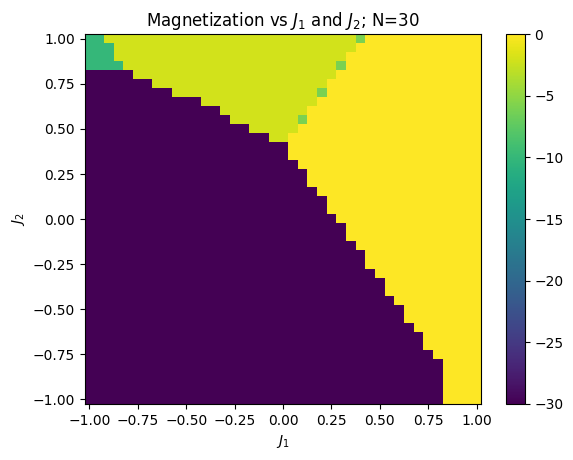

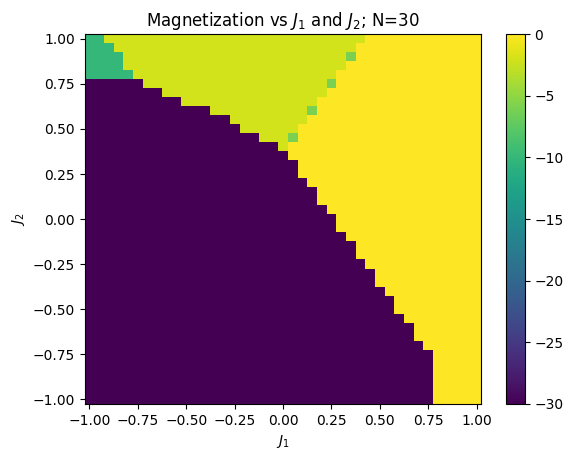

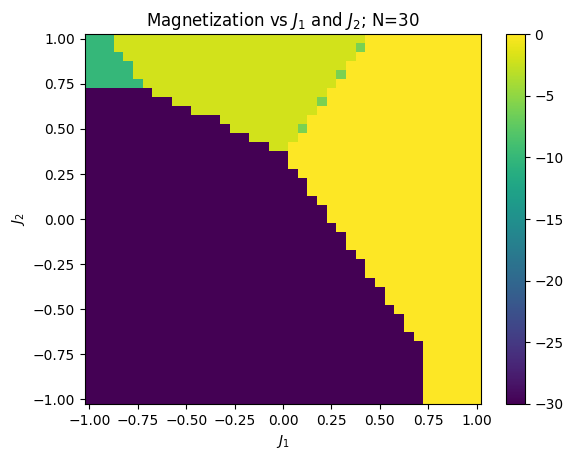

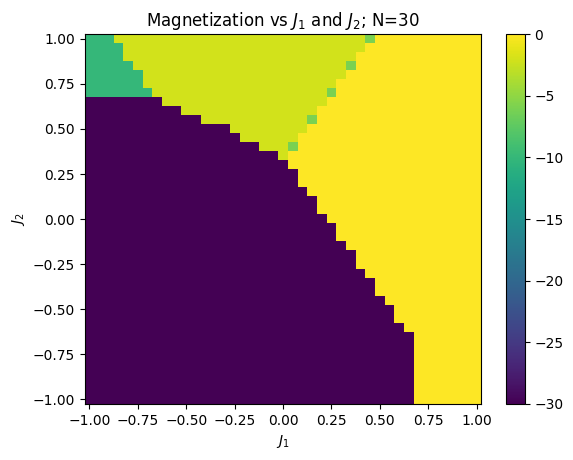

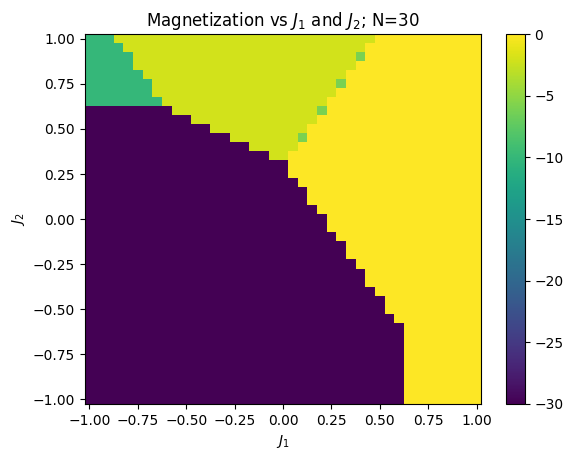

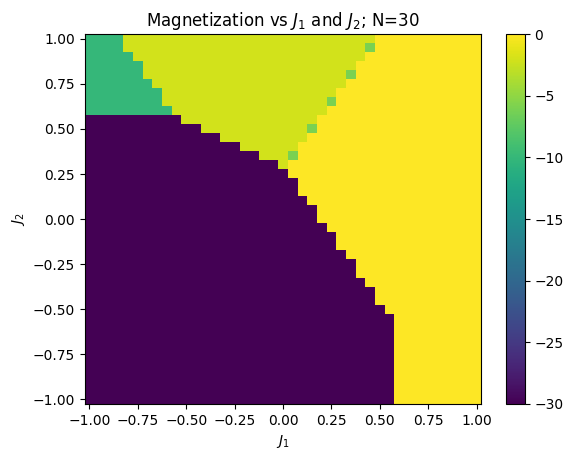

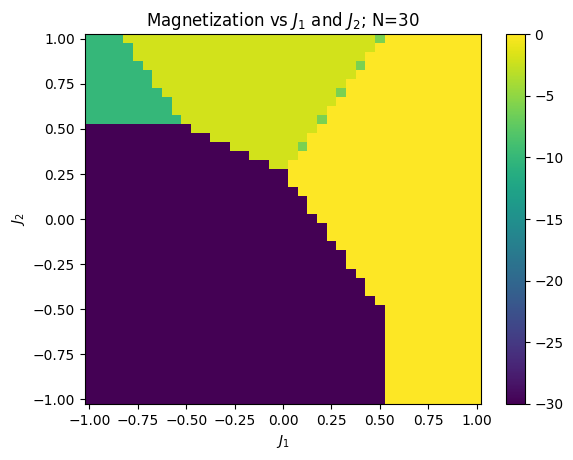

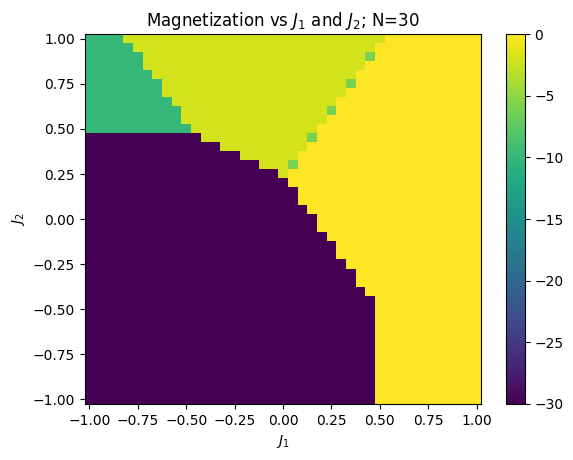

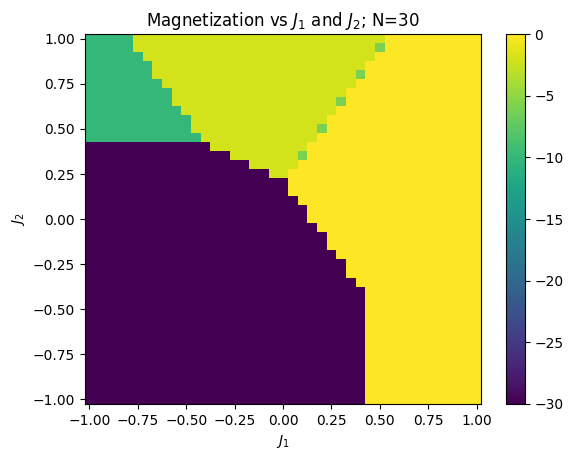

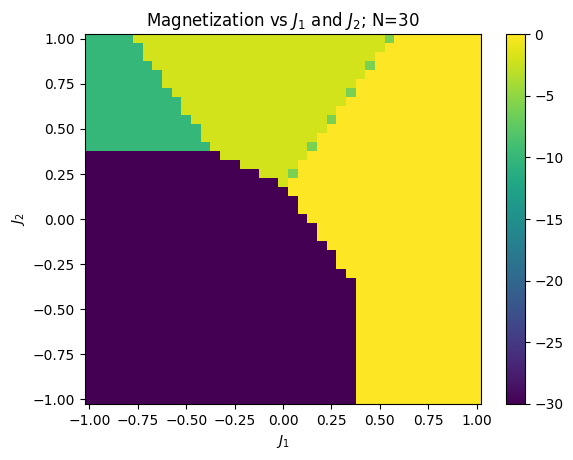

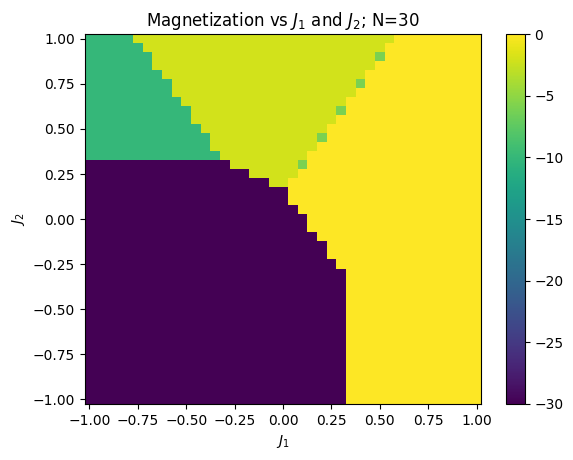

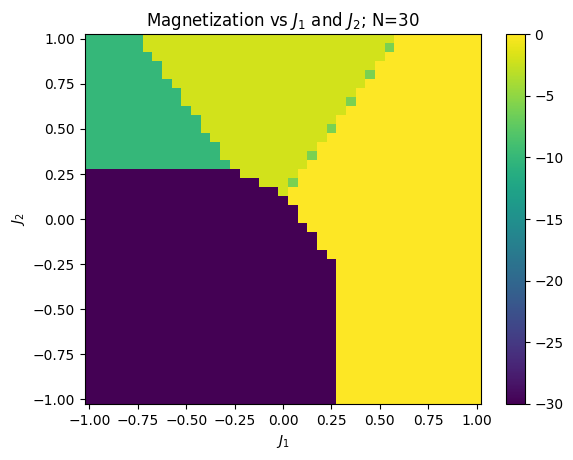

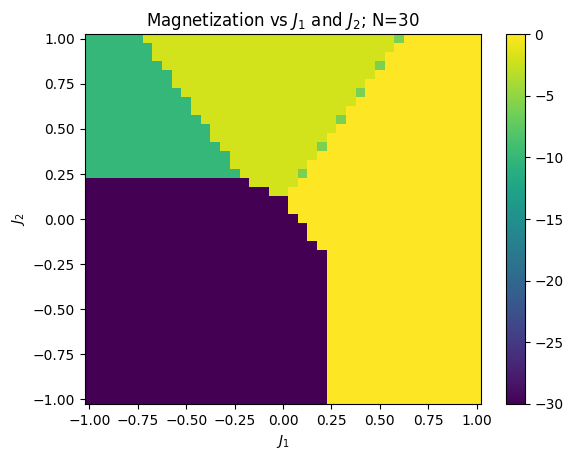

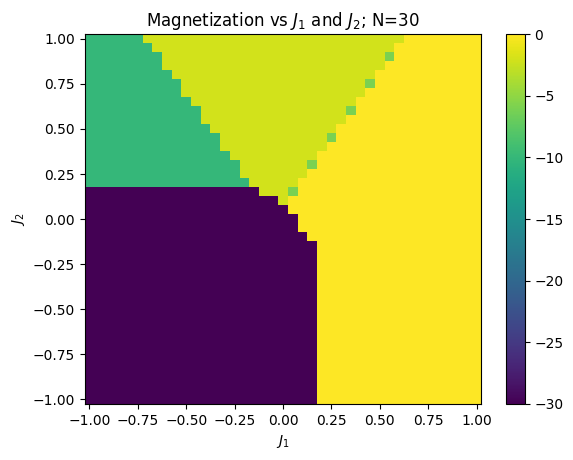

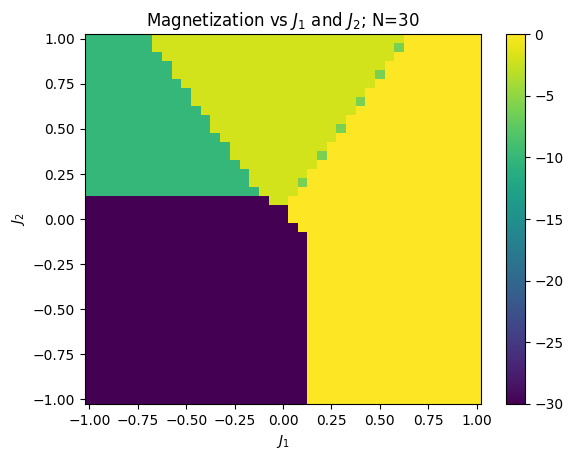

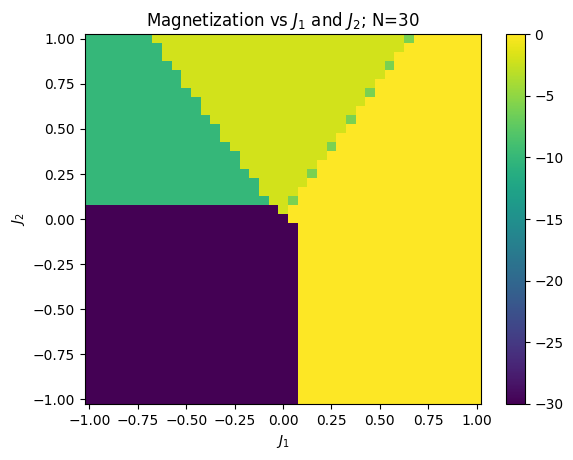

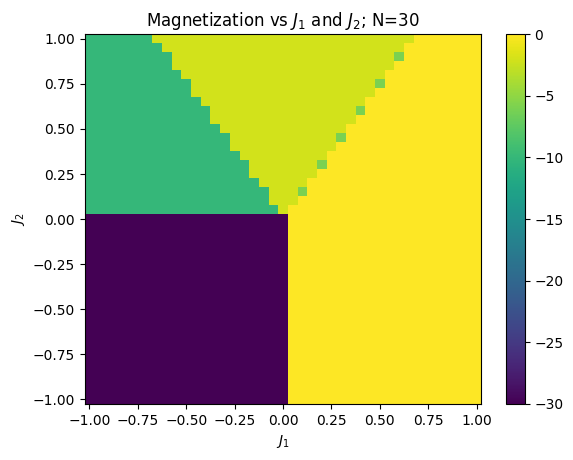

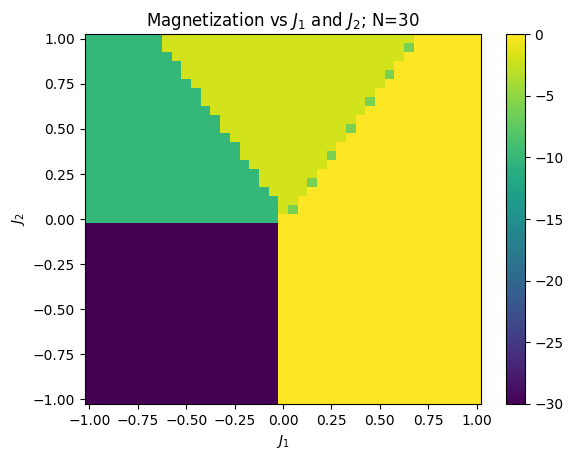

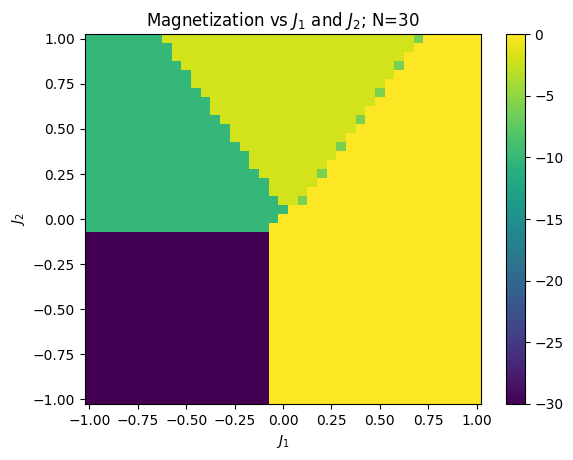

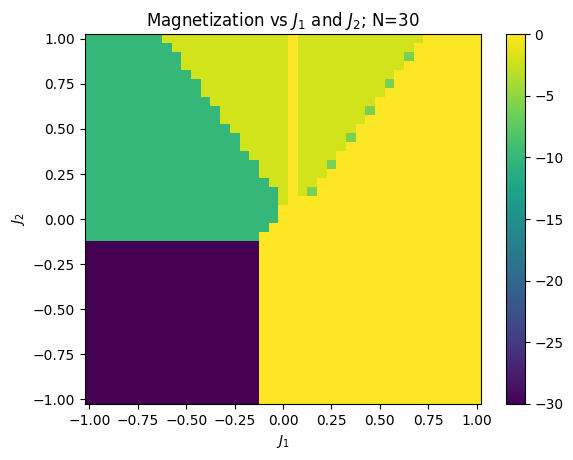

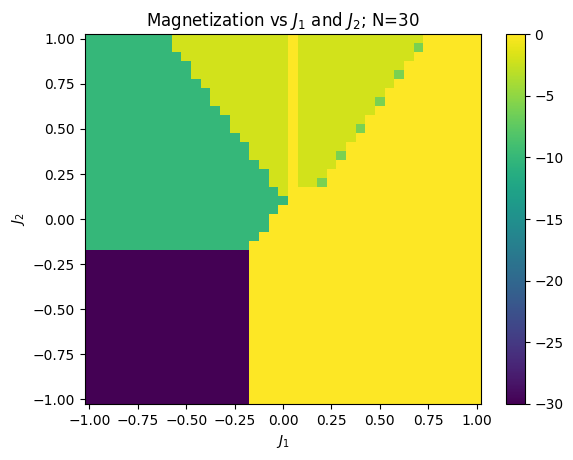

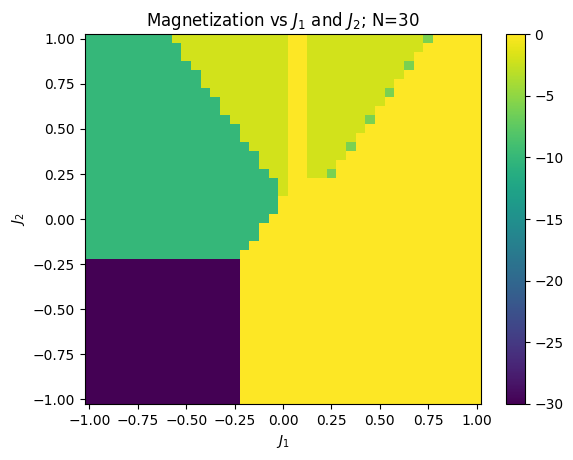

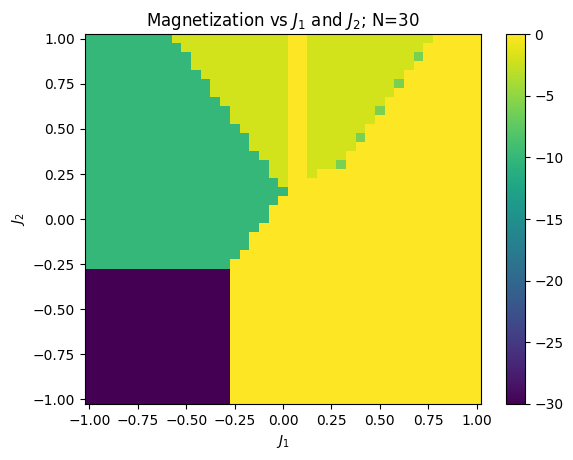

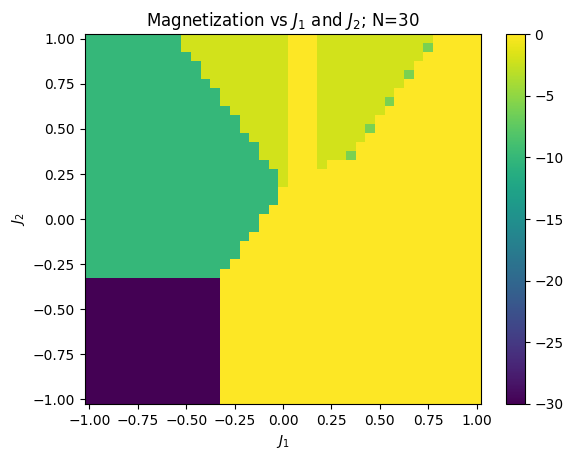

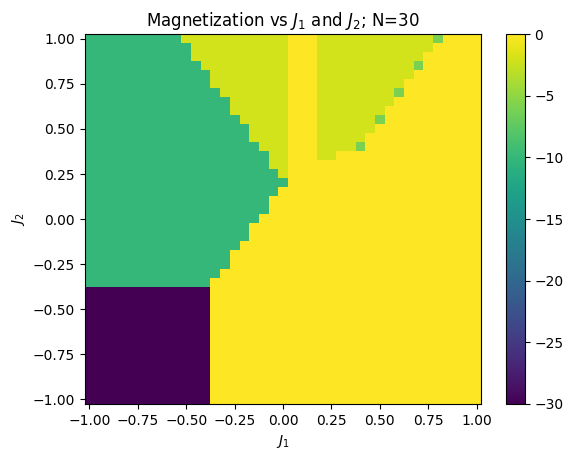

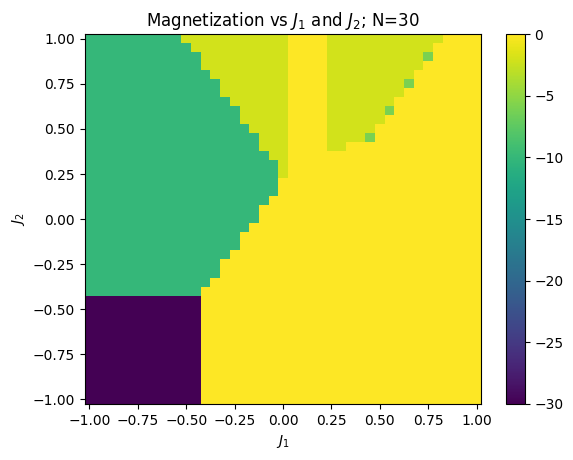

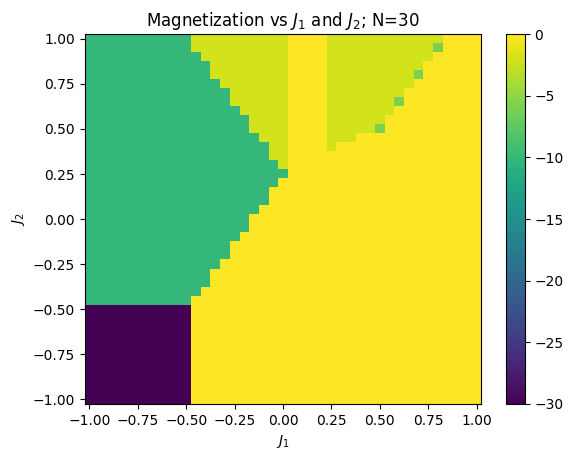

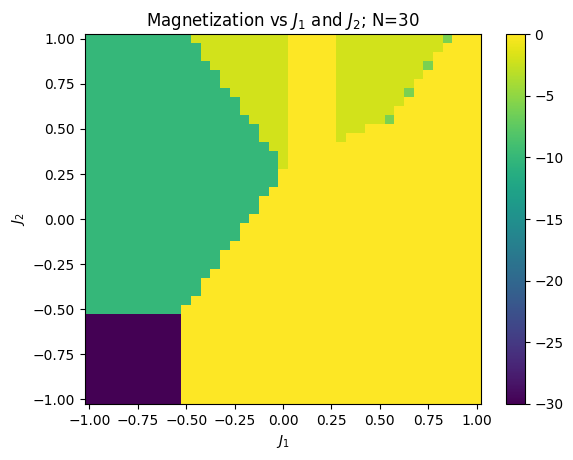

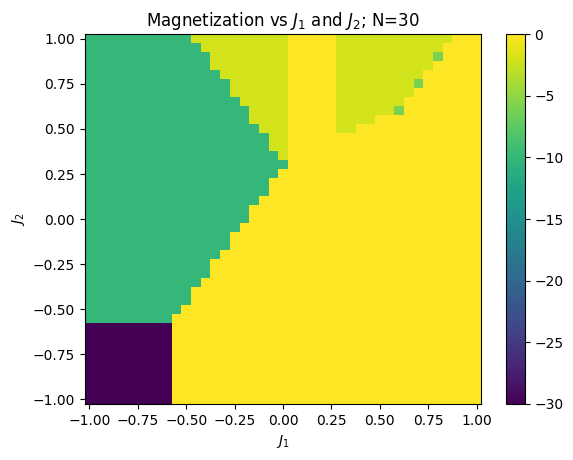

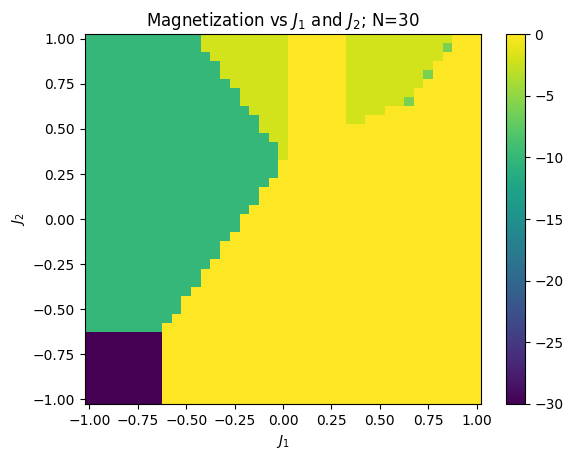

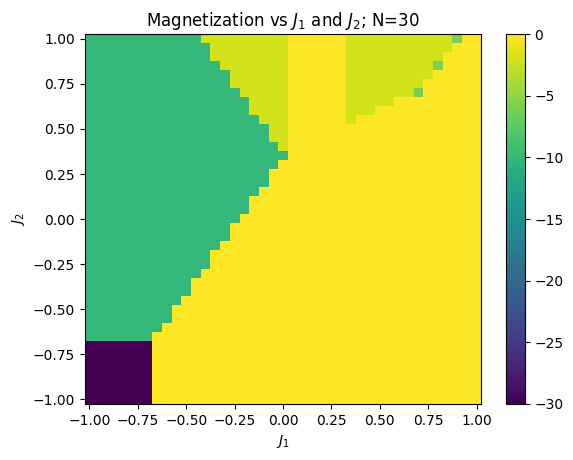

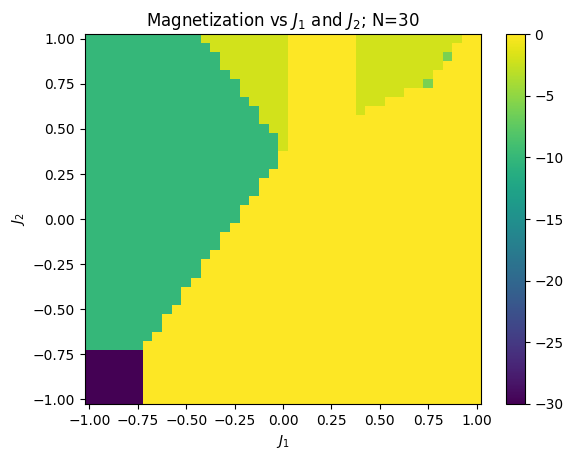

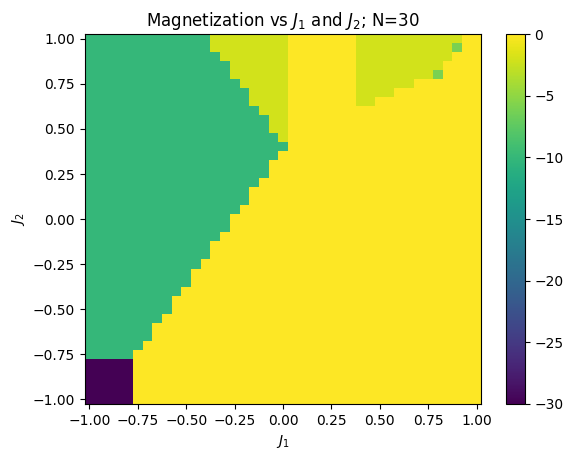

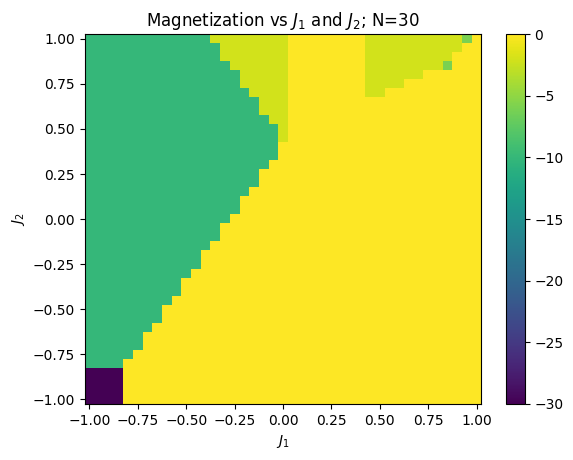

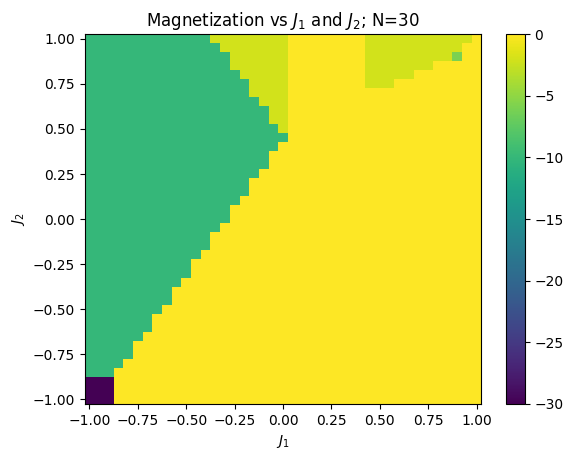

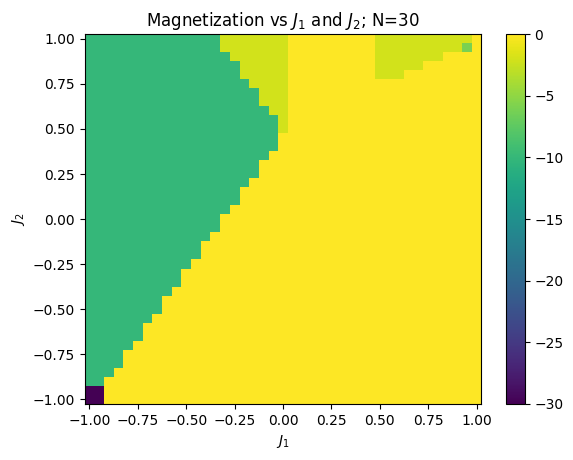

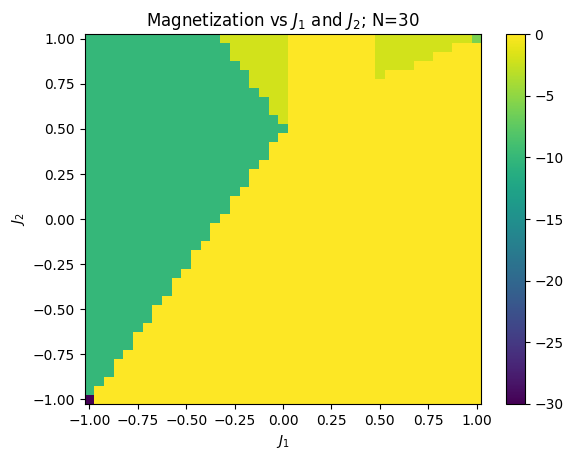

In [58]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = magnetization_30[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Magnetization vs $J_1$ and $J_2$; N=30")
    plt.show()

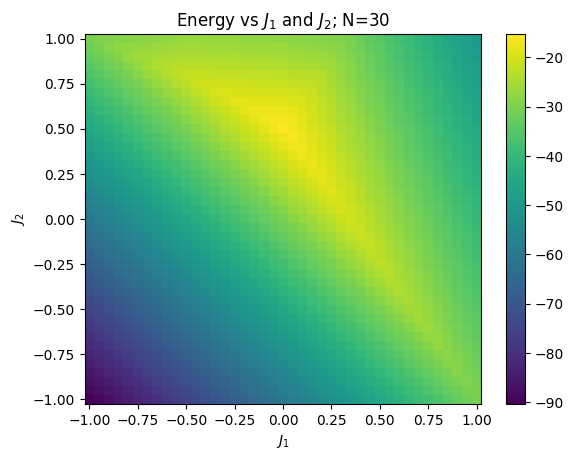

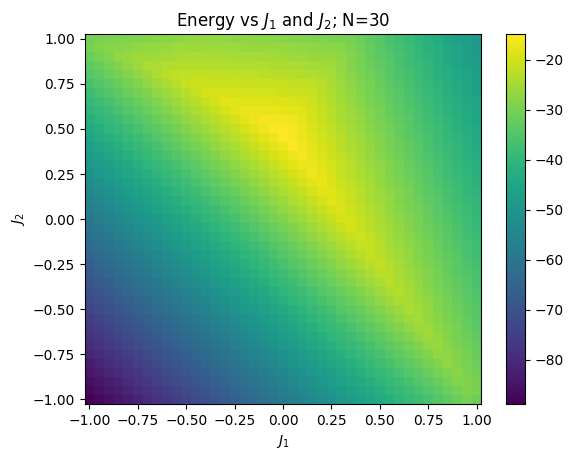

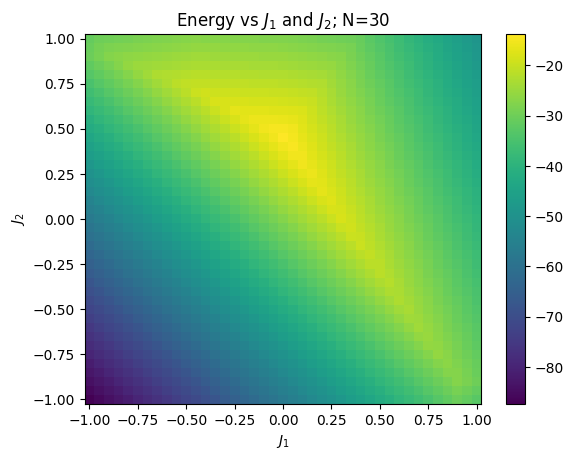

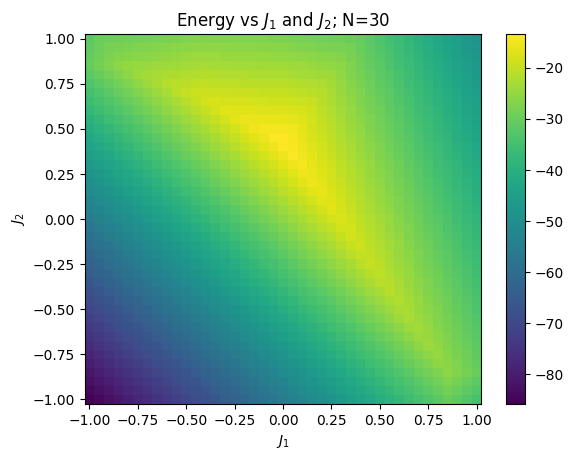

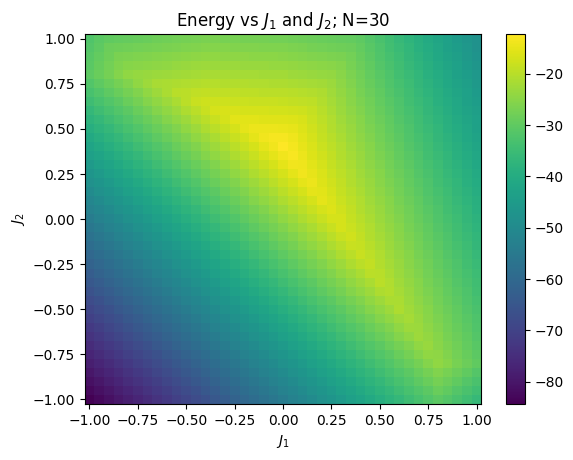

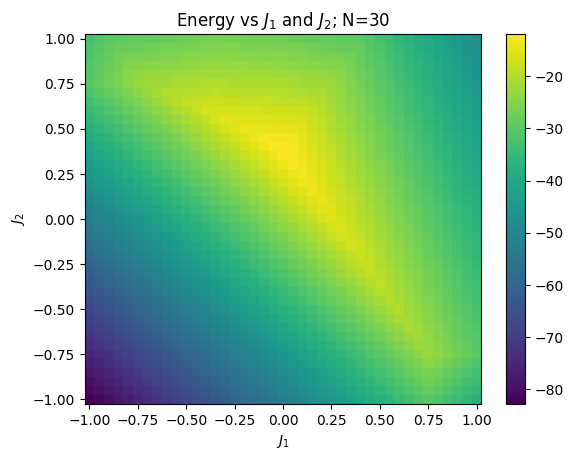

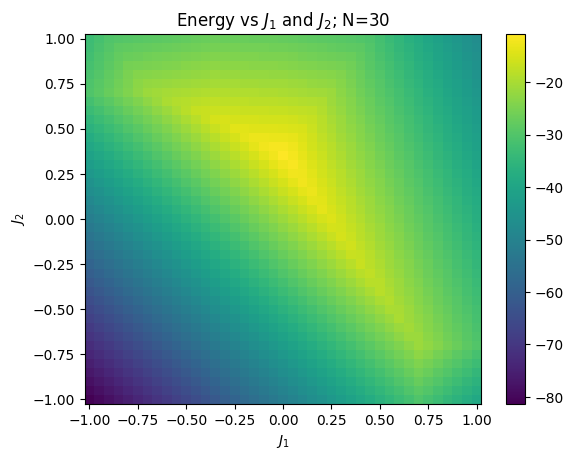

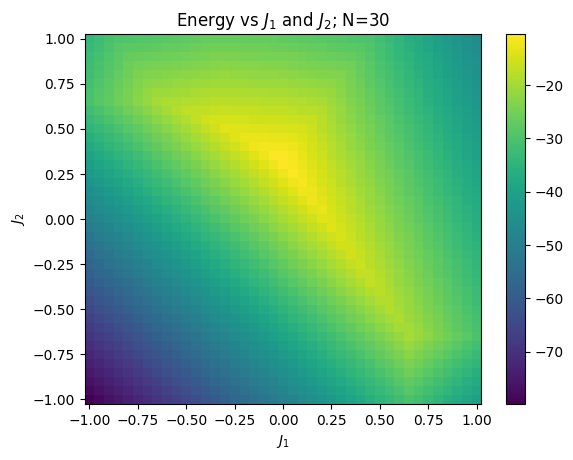

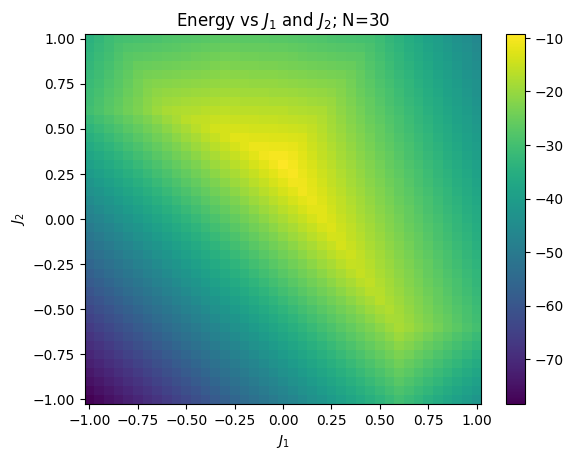

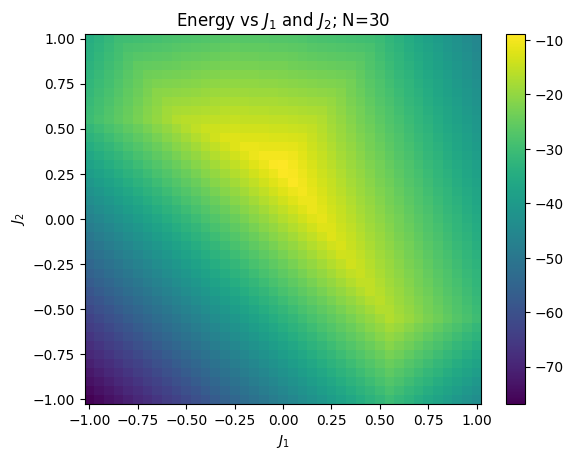

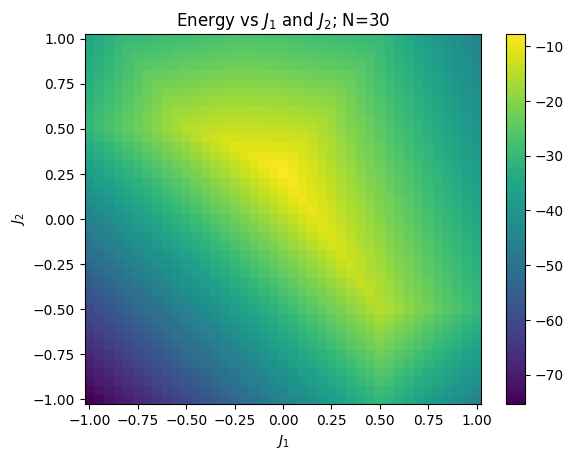

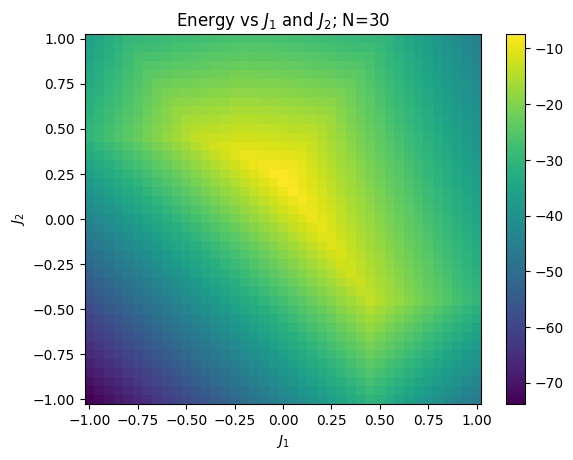

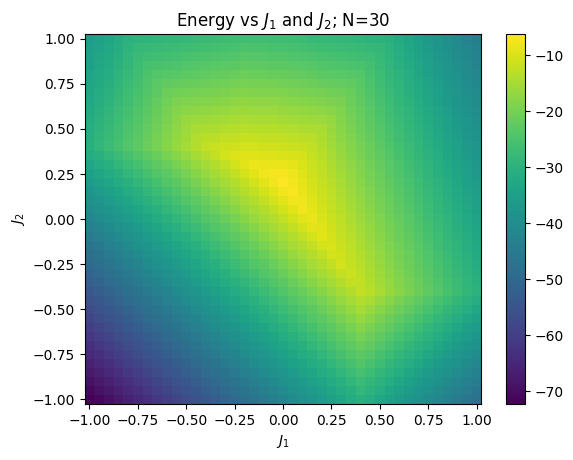

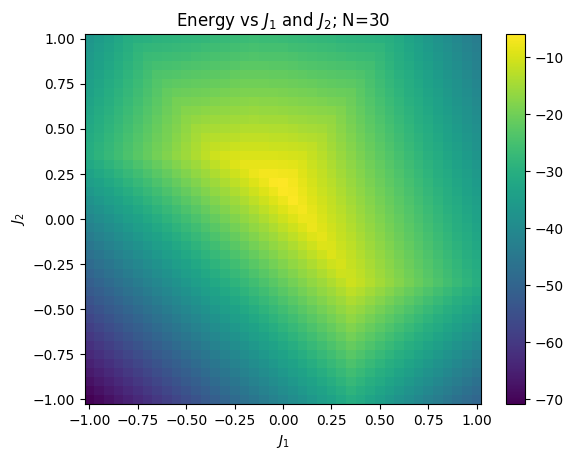

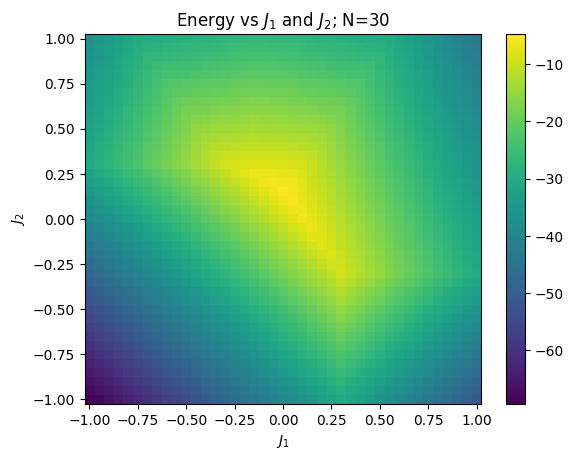

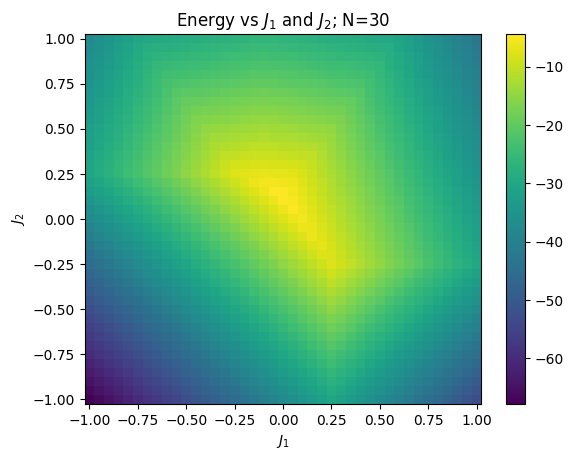

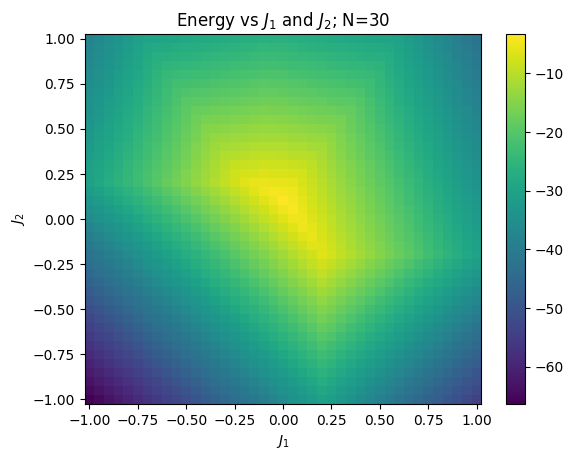

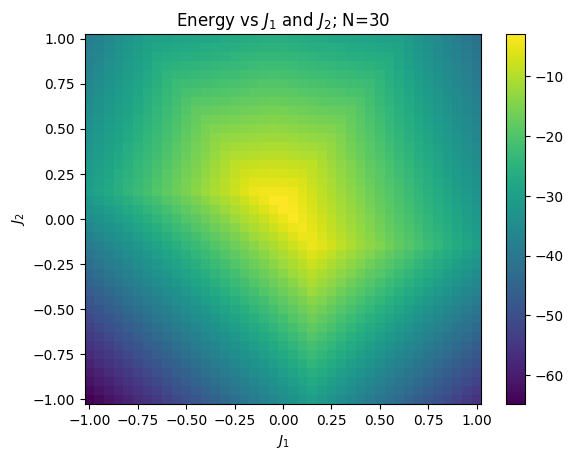

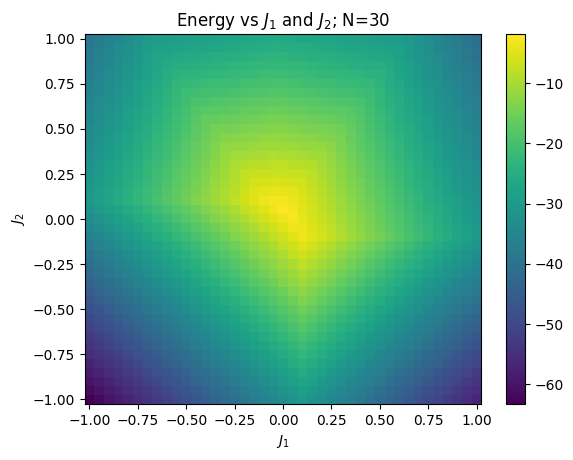

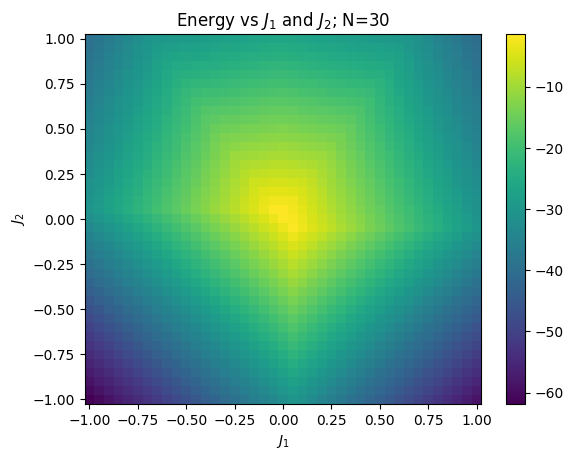

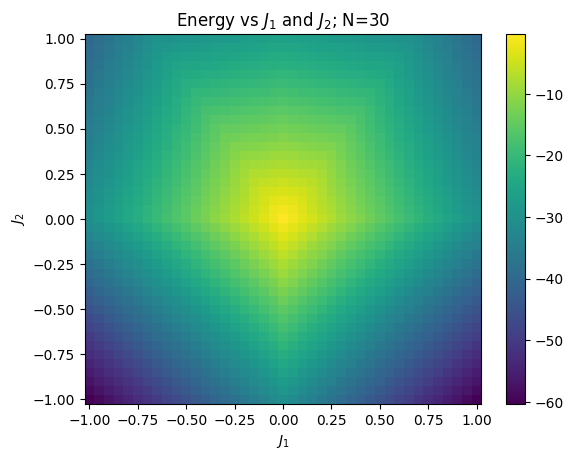

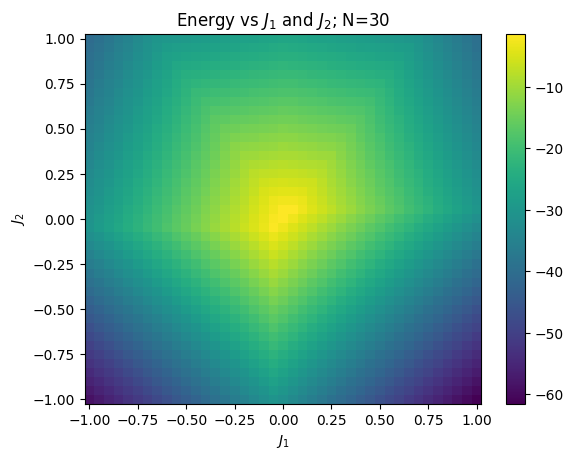

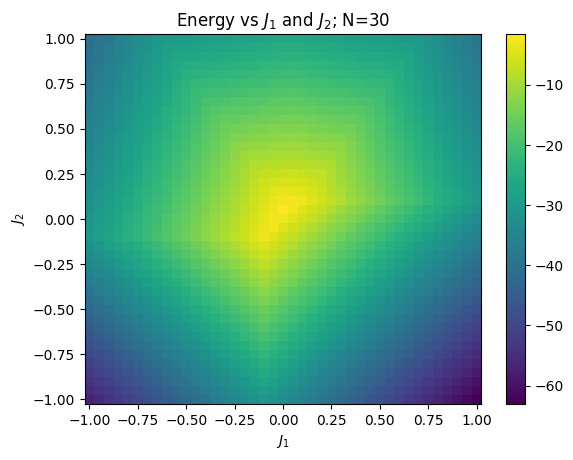

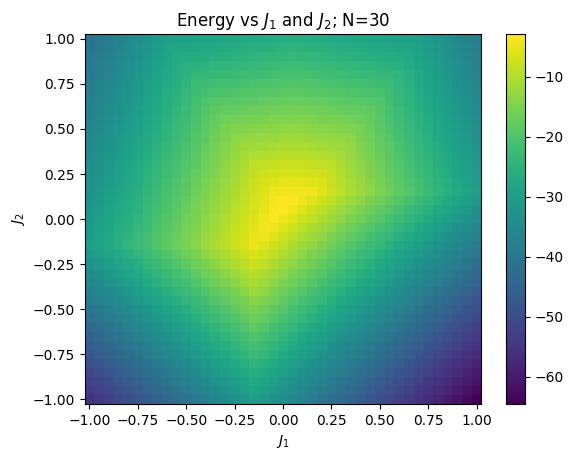

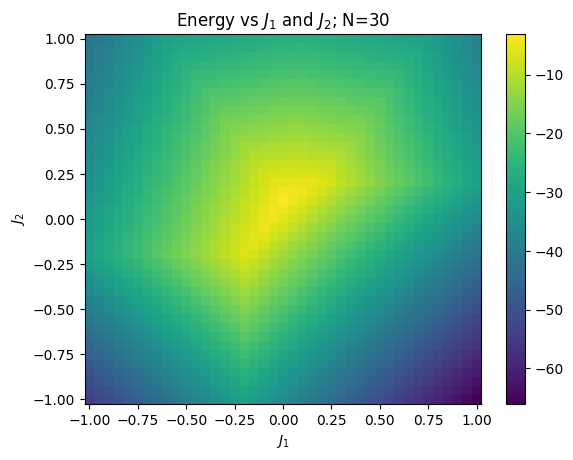

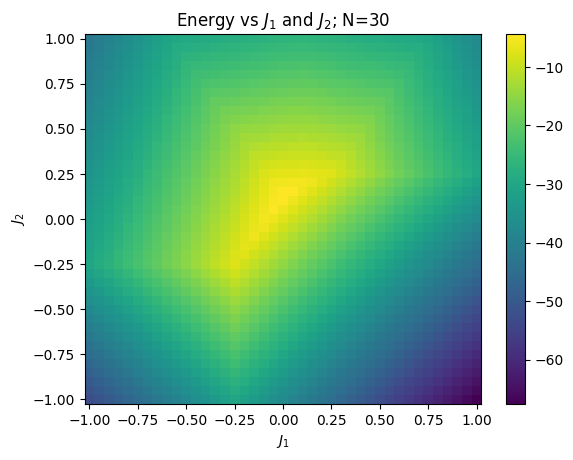

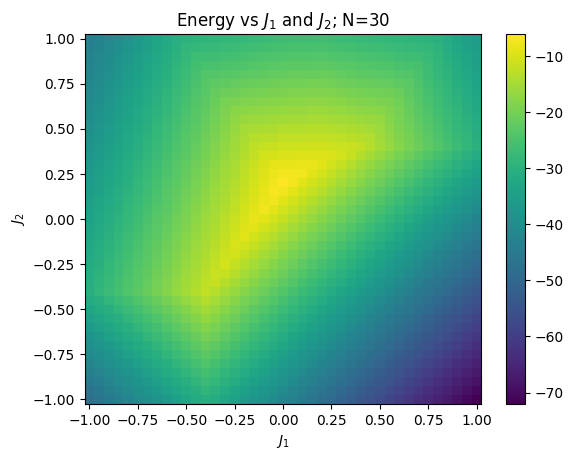

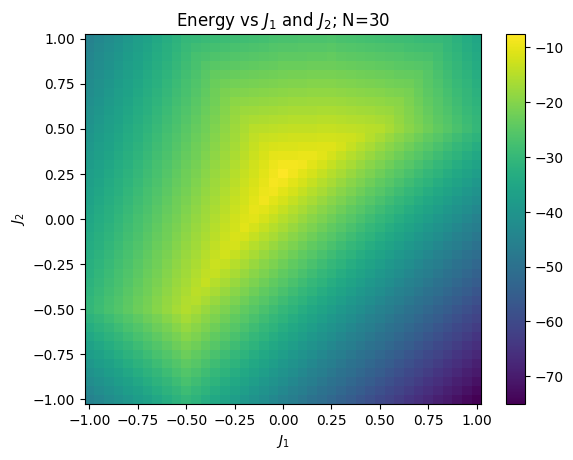

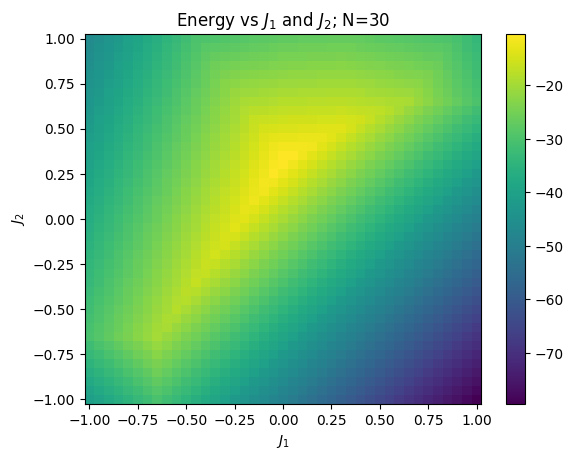

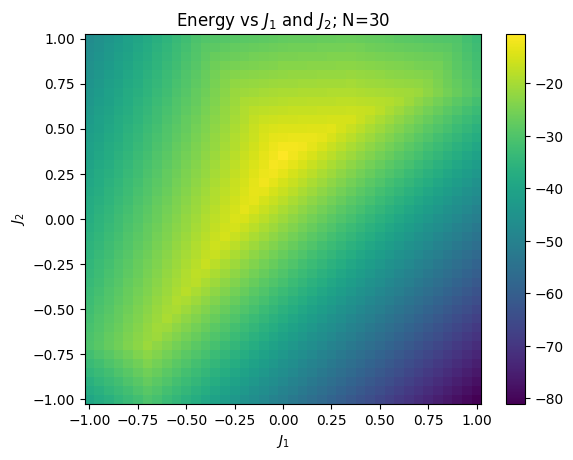

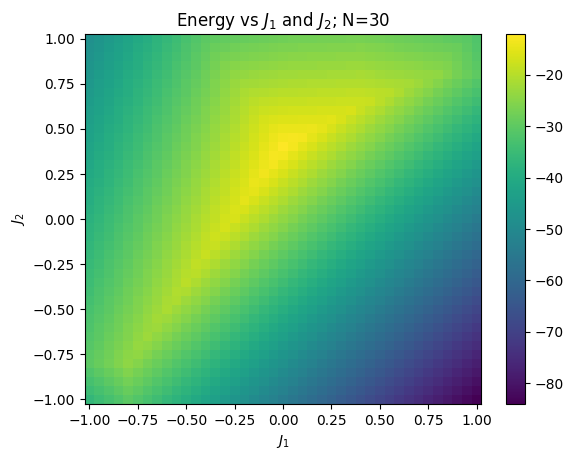

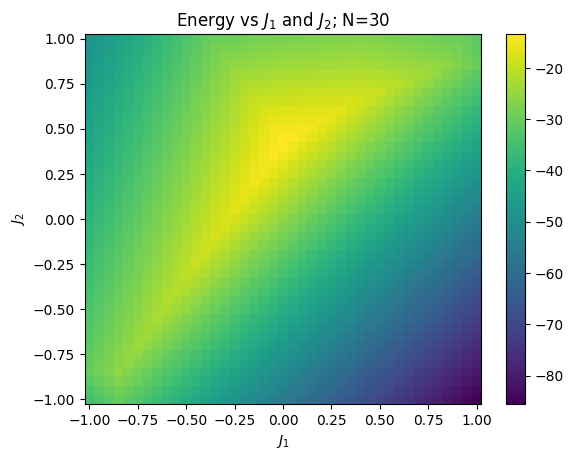

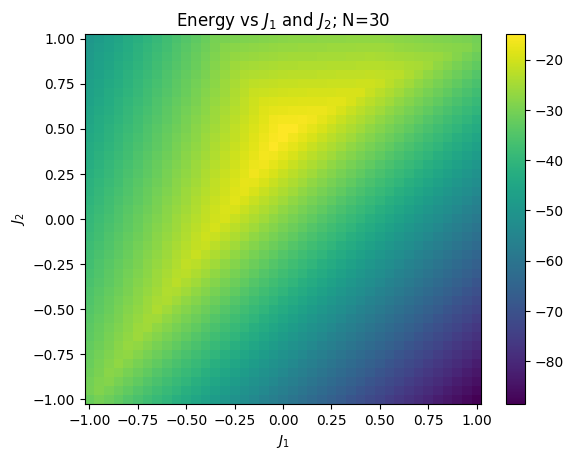

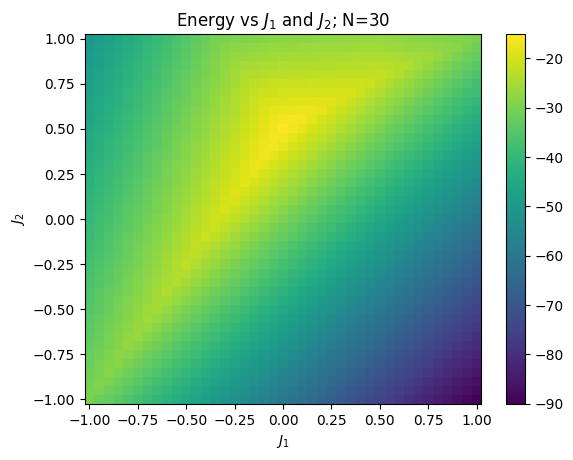

In [59]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = energy_30[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Energy vs $J_1$ and $J_2$; N=30")
    plt.show()

# N =18

In [ ]:
energy_12 = np.zeros((41, 41, 41))
magnetization_12 = np.zeros((41, 41, 41))
Ny= 30
h = 0.01
for i in range(0,41):
    for j in range(0,41):
        for k in range(0,41):
            j_1 = -1 + 0.05*i
            j_2 = -1 + 0.05*j
            j_3 = -1 + 0.05*k
            energy_1, spin_1, magnetization_1 = ising_model_3NN(Ny, h, j_1, j_2, j_3)
            energy_12[i][j][k] = energy_1
            magnetization_12[i][j][k] = magnetization_1


In [57]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = magnetization_12[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Magnetization vs $J_1$ and $J_2$; N=50")
    plt.show()

NameError: name 'magnetization_12' is not defined

In [ ]:
for i in range(0, 41):
    x = np.arange(-1,1.05,0.05)
    y = np.arange(-1,1.05,0.05)
    
    X, Y = np.meshgrid(x, y)
    Z = energy_12[i]
    plt.pcolormesh(X, Y, Z)
    plt.colorbar()
    plt.xlabel('$J_1$')
    plt.ylabel('$J_2$')
    plt.title("Energy vs $J_1$ and $J_2$; N=12")
    plt.show()